# I. IMPORT LIBRARIES AND DATA

## 1.1. IMPORT LIBRARIES

In [456]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

!pip install chart_studio
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px

!pip install inflection
import inflection

import datetime
from datetime import datetime
import calendar
from scipy import stats as stats
import xgboost as xgb

import statsmodels as sm
from scipy import stats

import math
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

## 1.2. IMPORT DATA

In [457]:
# Read csv file
data = pd.read_csv('https://github.com/0964725133/DAZONE24/raw/main/%5BDAZONE2024%5D%20DATASET%20ORIGINAL.csv')
data.tail()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
3064,2801,1990.0,Basic,20425.0,29-10-2021,5.0,5.0,14.0,5.0,3.0,...,0.0,0.0,Other,8.414996e+10,NaN,2021.0,10.0,7.0,Married_1,Online
3065,8551,1990.0,PhD,65295.0,23-12-2022,19.0,366.0,34.0,117.0,34.0,...,0.0,0.0,Female,NaN,8.409877e+10,2022.0,12.0,20.0,Single_0,Cash
3066,7831,1998.0,Graduation,31632.0,14-07-2022,92.0,18.0,10.0,12.0,11.0,...,0.0,0.0,Female,8.431896e+10,NaN,2022.0,7.0,6.0,Single_0,NaN
3067,6426,1994.0,Master,61794.0,14-09-2022,74.0,265.0,49.0,188.0,54.0,...,0.0,0.0,Male,8.452917e+10,NaN,2022.0,NaN,20.0,Married_1,Mobile
3068,4950,1983.0,NaN,75437.0,09-11-2022,25.0,796.0,2.0,545.0,95.0,...,0.0,0.0,Female,NaN,8.415671e+10,2022.0,NaN,NaN,Together_0,NaN


In [458]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3069 non-null   int64  
 1   Year_Of_Birth          2832 non-null   float64
 2   Academic_Level         2799 non-null   object 
 3   Income                 2782 non-null   float64
 4   Registration_Time      2824 non-null   object 
 5   Recency                2804 non-null   float64
 6   Liquor                 2807 non-null   float64
 7   Vegetables             2810 non-null   float64
 8   Pork                   2806 non-null   float64
 9   Seafood                2813 non-null   float64
 10  Candy                  2840 non-null   float64
 11  Jewellery              2792 non-null   float64
 12  Num_Deals_Purchases    2841 non-null   float64
 13  Num_Web_Purchases      2823 non-null   float64
 14  Num_Catalog_Purchases  2811 non-null   float64
 15  Num_

# II. DATA CLEANING

## 2.1. DATA TYPE CORRECTION

In [459]:
data.dtypes

ID                         int64
Year_Of_Birth            float64
Academic_Level            object
Income                   float64
Registration_Time         object
Recency                  float64
Liquor                   float64
Vegetables               float64
Pork                     float64
Seafood                  float64
Candy                    float64
Jewellery                float64
Num_Deals_Purchases      float64
Num_Web_Purchases        float64
Num_Catalog_Purchases    float64
Num_Store_Purchases      float64
Num_Web_Visits_Month     float64
Promo_30                 float64
Promo_40                 float64
Promo_50                 float64
Promo_10                 float64
Promo_20                 float64
Complain                 float64
Gender                    object
Phone                    float64
Phone_Number             float64
Year_Register            float64
Month_Register           float64
Total_Purchase           float64
Living_With               object
Payment_Me

In [460]:
# Change data type
data['Registration_Time'] = pd.to_datetime(data['Registration_Time'])

## 2.2. HANDLING OUTLIERS AND DUPLICATE

In [461]:
# Function to replace outliers with the median using Z-score method
def replace_outliers_with_zscore(data, column):
    z_scores = stats.zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    median = data[column].median()
    data[column] = np.where(abs_z_scores > 5, median, data[column])

# Apply the function to all numerical columns
numerical_columns = data.select_dtypes(include = ['float64', 'int64']).columns
for col in numerical_columns:
    replace_outliers_with_zscore(data, col)



In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3069 non-null   float64       
 1   Year_Of_Birth          2832 non-null   float64       
 2   Academic_Level         2799 non-null   object        
 3   Income                 2782 non-null   float64       
 4   Registration_Time      2824 non-null   datetime64[ns]
 5   Recency                2804 non-null   float64       
 6   Liquor                 2807 non-null   float64       
 7   Vegetables             2810 non-null   float64       
 8   Pork                   2806 non-null   float64       
 9   Seafood                2813 non-null   float64       
 10  Candy                  2840 non-null   float64       
 11  Jewellery              2792 non-null   float64       
 12  Num_Deals_Purchases    2841 non-null   float64       
 13  Num

In [463]:
# Drop duplicate id
# Count the number of non-null values in each row
data['non_null_count'] = data.notnull().sum(axis = 1)

# Sort the DataFrame by 'id and 'non_null_count' in descending order
data = data.sort_values(['ID', 'non_null_count'], ascending = [True, False])
# Drop duplicate IDs, keeping the first occurence (most columns filled)
data = data.drop_duplicates(subset = 'ID', keep = 'first')
# Drop the 'non_null_count' column
data = data.drop('non_null_count', axis = 1)
data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
831,1001.0,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,0.0,0.0,Other,8.412036e+10,NaN,NaN,NaN,31.0,Married_1,Card
1132,1002.0,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,0.0,0.0,Male,8.494833e+10,NaN,NaN,6.0,21.0,Married_1,Mobile
301,1005.0,1978.0,2n Cycle,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,0.0,0.0,Female,8.444028e+10,NaN,2022.0,5.0,27.0,Single_0,Online
1101,1006.0,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,0.0,0.0,Female,8.494006e+10,NaN,2021.0,NaN,7.0,Together_1,Online
2888,1007.0,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,0.0,0.0,Male,8.433939e+10,NaN,2021.0,9.0,33.0,Divorced_1,Card


In [464]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 831 to 1054
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2240 non-null   float64       
 1   Year_Of_Birth          2240 non-null   float64       
 2   Academic_Level         2240 non-null   object        
 3   Income                 2216 non-null   float64       
 4   Registration_Time      2240 non-null   datetime64[ns]
 5   Recency                2240 non-null   float64       
 6   Liquor                 2240 non-null   float64       
 7   Vegetables             2240 non-null   float64       
 8   Pork                   2240 non-null   float64       
 9   Seafood                2240 non-null   float64       
 10  Candy                  2240 non-null   float64       
 11  Jewellery              2240 non-null   float64       
 12  Num_Deals_Purchases    2240 non-null   float64       
 13  Num_We

## 2.3. FILLING MISSING DATA

In [465]:
# Missing values and missing values percentage
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2) != 0]
    return pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])

In [466]:
missing_percentage(data)

,Total,Percentage
Phone_Number,1240,55.36
Phone,1000,44.64
Year_Register,580,25.89
Month_Register,573,25.58
Payment_Method,446,19.91
Income,24,1.07


In [467]:
# Drop unnecessary columns
data = data.drop(['Phone_Number', 'Phone', 'Year_Register', 'Month_Register'], axis = 1)

In [468]:
data['Payment_Method'].fillna('Other', inplace = True)

In [469]:
# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Display the last few rows of the cleaned dataset
data.tail()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Total_Purchase,Living_With,Payment_Method
110,9980.0,1992.0,Graduation,22010.0,2022-06-30,51.0,12.0,4.0,9.0,3.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,Male,7.0,Together_1,Online
1920,9985.0,1986.0,Graduation,38361.0,2022-12-27,74.0,40.0,2.0,56.0,20.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,Female,10.0,Together_1,Cash
2315,9986.0,1990.0,Graduation,56628.0,2023-03-21,30.0,480.0,7.0,82.0,7.0,...,1.0,1.0,0.0,0.0,0.0,0.0,Male,20.0,Single_1,Mobile
1903,9990.0,1993.0,Graduation,75330.0,2021-10-04,94.0,556.0,84.0,257.0,93.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,Other,29.0,Married_2,Online
1054,9997.0,1994.0,Graduation,56243.0,2022-12-30,26.0,348.0,2.0,35.0,4.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,Male,20.0,Single_3,Online


In [470]:
missing_percentage(data)

,Total,Percentage


In [471]:
# Create new columns (Marital_Status and Children from Living_With)
data[['Marital_Status', 'Children']] = data['Living_With'].str.split('_', expand=True)

# Drop the original 'Living_With' column
data.drop(columns=['Living_With'], inplace=True)

# Display the last few rows of the dataset
data.tail()


,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Total_Purchase,Payment_Method,Marital_Status,Children
110,9980.0,1992.0,Graduation,22010.0,2022-06-30,51.0,12.0,4.0,9.0,3.0,...,-1.0,0.0,0.0,0.0,0.0,Male,7.0,Online,Together,1
1920,9985.0,1986.0,Graduation,38361.0,2022-12-27,74.0,40.0,2.0,56.0,20.0,...,-1.0,0.0,0.0,0.0,0.0,Female,10.0,Cash,Together,1
2315,9986.0,1990.0,Graduation,56628.0,2023-03-21,30.0,480.0,7.0,82.0,7.0,...,1.0,0.0,0.0,0.0,0.0,Male,20.0,Mobile,Single,1
1903,9990.0,1993.0,Graduation,75330.0,2021-10-04,94.0,556.0,84.0,257.0,93.0,...,-1.0,0.0,0.0,0.0,0.0,Other,29.0,Online,Married,2
1054,9997.0,1994.0,Graduation,56243.0,2022-12-30,26.0,348.0,2.0,35.0,4.0,...,-1.0,0.0,0.0,0.0,0.0,Male,20.0,Online,Single,3


In [472]:
# Change 'Children' column data type
data['Children'] = data['Children'].astype('int')

In [473]:
# Replace value -1 with 1 in 'Promo_40' column
data['Promo_40'] = data['Promo_40'].replace(-1, 1)

In [474]:
# Extract time attributes from these datetime columns (year, month, day, day of week, hour)
data['Year_Month'] = data['Registration_Time'].map(lambda x: 100*x.year + x.month)
data['Year'] = data['Registration_Time'].map(lambda x: x.year)
data['Month'] = data['Registration_Time'].map(lambda x: x.month)
data['Day'] = data['Registration_Time'].map(lambda x: x.day)
data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Complain,Gender,Total_Purchase,Payment_Method,Marital_Status,Children,Year_Month,Year,Month,Day
831,1001.0,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,0.0,Other,31.0,Card,Married,1,202108,2021,8,17
1132,1002.0,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,0.0,Male,21.0,Mobile,Married,1,202206,2022,6,26
301,1005.0,1978.0,2n Cycle,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,0.0,Female,27.0,Online,Single,0,202205,2022,5,12
1101,1006.0,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,0.0,Female,7.0,Online,Together,1,202112,2021,12,30
2888,1007.0,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,0.0,Male,33.0,Card,Divorced,1,202109,2021,9,22


In [475]:
# Calculate the current year
current_year = pd.Timestamp.now().year

# Calculate the age of the customers
data['Age'] = current_year - data['Year_Of_Birth']
data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Gender,Total_Purchase,Payment_Method,Marital_Status,Children,Year_Month,Year,Month,Day,Age
831,1001.0,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,Other,31.0,Card,Married,1,202108,2021,8,17,30.0
1132,1002.0,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,Male,21.0,Mobile,Married,1,202206,2022,6,26,35.0
301,1005.0,1978.0,2n Cycle,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,Female,27.0,Online,Single,0,202205,2022,5,12,46.0
1101,1006.0,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,Female,7.0,Online,Together,1,202112,2021,12,30,37.0
2888,1007.0,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,Male,33.0,Card,Divorced,1,202109,2021,9,22,28.0


In [476]:
data['Weekday'] = data['Registration_Time'].dt.day_name()

# III. EDA AND VISUALIZATION

In [477]:
data_eda = data.copy()

In [478]:
data_eda.columns.to_list()

['ID',
 'Year_Of_Birth',
 'Academic_Level',
 'Income',
 'Registration_Time',
 'Recency',
 'Liquor',
 'Vegetables',
 'Pork',
 'Seafood',
 'Candy',
 'Jewellery',
 'Num_Deals_Purchases',
 'Num_Web_Purchases',
 'Num_Catalog_Purchases',
 'Num_Store_Purchases',
 'Num_Web_Visits_Month',
 'Promo_30',
 'Promo_40',
 'Promo_50',
 'Promo_10',
 'Promo_20',
 'Complain',
 'Gender',
 'Total_Purchase',
 'Payment_Method',
 'Marital_Status',
 'Children',
 'Year_Month',
 'Year',
 'Month',
 'Day',
 'Age',
 'Weekday']

In [479]:
# Rename all columns
old_cols = ['ID', 'Year_Of_Birth', 'Academic_Level', 'Income', 'Registration_Time', 'Recency',
            'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery',
            'Num_Deals_Purchases', 'Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month',
            'Promo_30', 'Promo_40', 'Promo_50', 'Promo_10', 'Promo_20', 'Complain', 'Gender',
            'Total_Purchase', 'Payment_Method', 'Marital_Status', 'Children',
            'Year_Month', 'Year', 'Month', 'Day', 'Age', 'Weekday']

new_cols = list(map(lambda x: inflection.underscore(x), old_cols))

data_eda.columns = new_cols
data_eda.head()

,id,year_of_birth,academic_level,income,registration_time,recency,liquor,vegetables,pork,seafood,...,total_purchase,payment_method,marital_status,children,year_month,year,month,day,age,weekday
831,1001.0,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,31.0,Card,Married,1,202108,2021,8,17,30.0,Tuesday
1132,1002.0,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,21.0,Mobile,Married,1,202206,2022,6,26,35.0,Sunday
301,1005.0,1978.0,2n Cycle,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,27.0,Online,Single,0,202205,2022,5,12,46.0,Thursday
1101,1006.0,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,7.0,Online,Together,1,202112,2021,12,30,37.0,Thursday
2888,1007.0,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,33.0,Card,Divorced,1,202109,2021,9,22,28.0,Wednesday


## 3.1. DATA VISUALIZATION

In [480]:
data_viz = data_eda.copy()

In [481]:
# Numerical Features
num_att = data_viz.select_dtypes(include = ['int32', 'int64', 'float64'])

In [482]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame(num_att.apply(np.mean) ).T
ct2 = pd.DataFrame(num_att.apply(np.median)).T

# Dispersion - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame(num_att.apply(np.std)).T
d2 = pd.DataFrame(num_att.apply(min)).T
d3 = pd.DataFrame(num_att.apply(max)).T
d4 = pd.DataFrame(num_att.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_att.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T

# Concatenate
metrics = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
metrics.columns = (['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])
metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1001.0,9997.0,8996.0,5490.537500,5509.5,2594.908309,-0.006258,-1.192202
1,year_of_birth,1975.0,2002.0,27.0,1987.934821,1988.0,4.973343,0.052150,-0.174909
2,income,1730.0,666666.0,664936.0,52237.975446,51381.5,25032.366437,6.800947,161.400144
3,recency,0.0,99.0,99.0,49.109375,49.0,28.955987,-0.001987,-1.201897
4,liquor,1.0,1494.0,1493.0,304.935714,174.5,336.522251,1.175771,0.598744
5,vegetables,2.0,201.0,199.0,28.302232,10.0,39.764555,2.102063,4.050976
6,pork,0.0,1725.0,1725.0,166.950000,67.0,225.664984,2.083233,5.516724
7,seafood,0.0,259.0,259.0,37.525446,12.0,54.616784,1.919769,3.096461
8,candy,0.0,263.0,263.0,27.062946,8.0,41.271283,2.136081,4.376548
9,jewellery,0.0,362.0,362.0,44.021875,24.0,52.155793,1.886106,3.551709


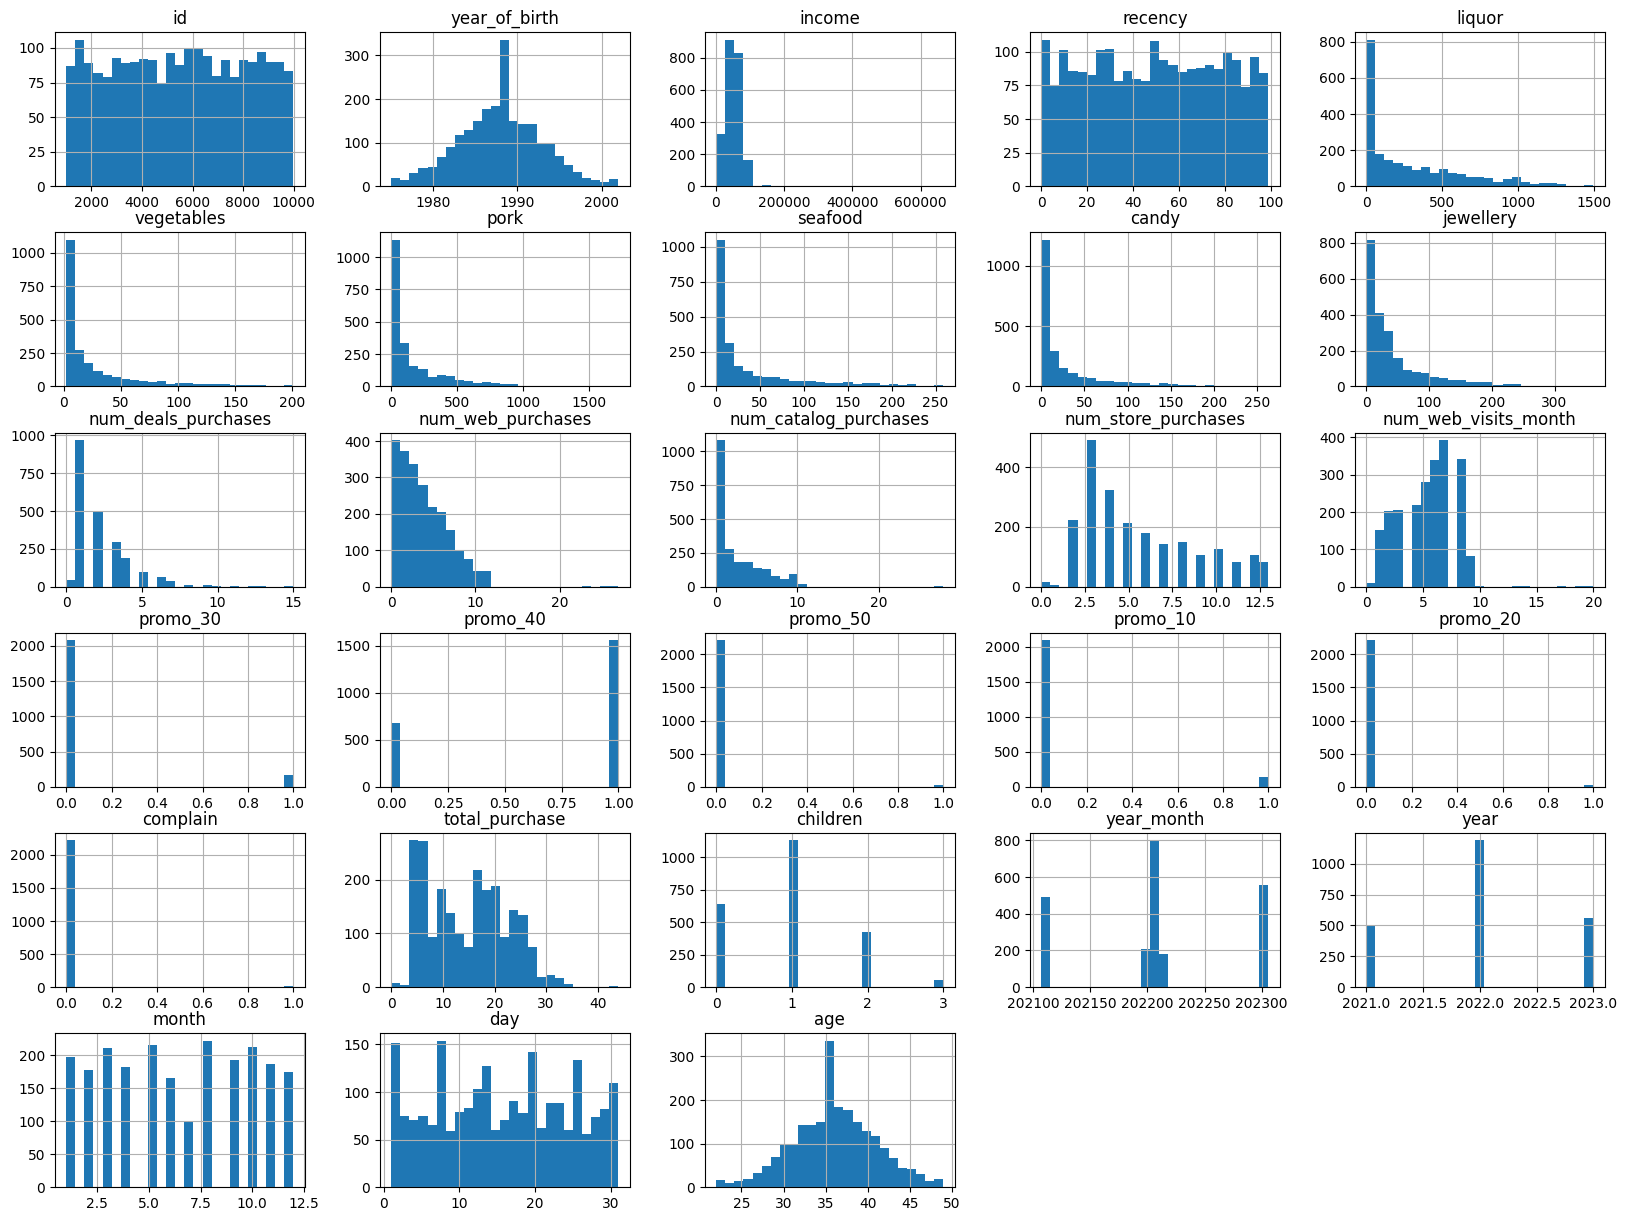

In [483]:
num_att.hist(bins = 25, figsize = (20, 15));
plt.show();

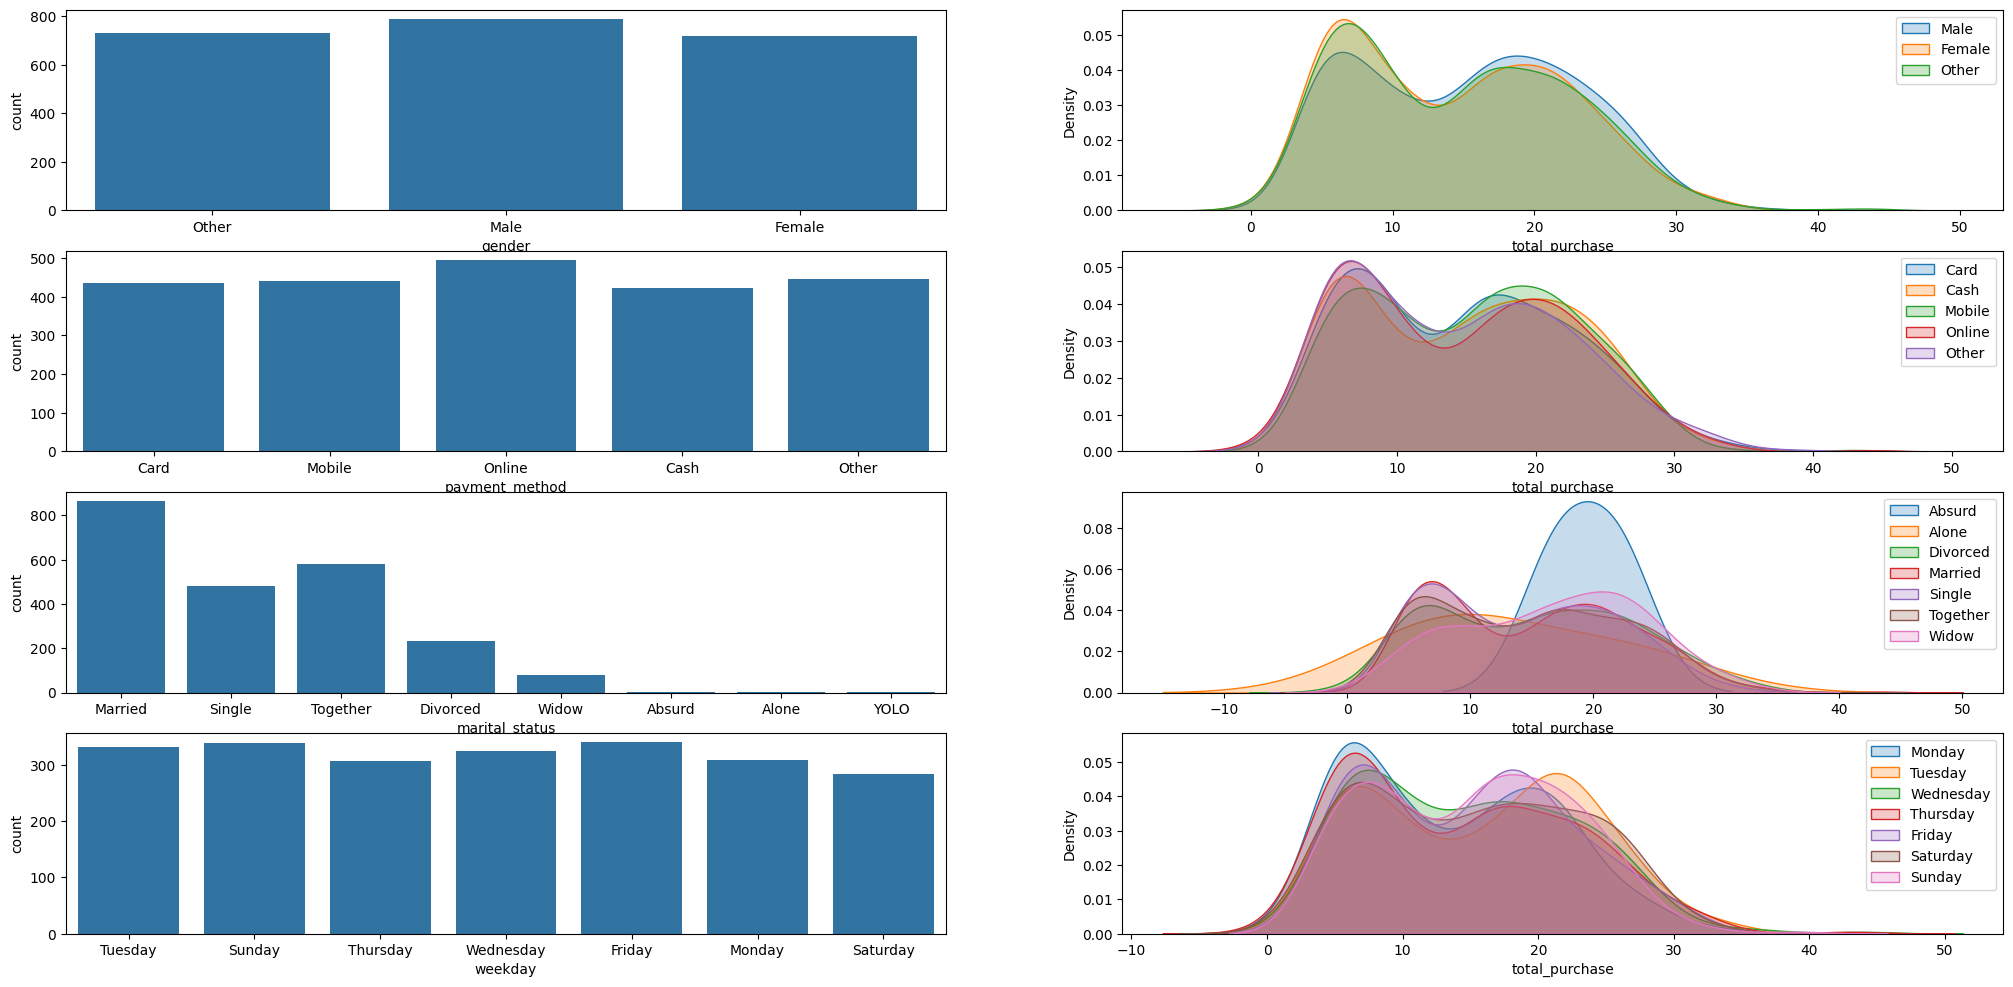

In [484]:
# Categorical features
cat_att = data_viz.select_dtypes(exclude = ['int32', 'int64', 'datetime64[ns]'])

plt.figure(figsize = (25, 12))

# Gender
plt.subplot(4, 2, 1)
sns.countplot(data = data_viz, x = 'gender')

plt.subplot(4, 2, 2)
sns.kdeplot(data_viz[data_viz['gender'] == 'Male']['total_purchase'], label = 'Male', shade = True)
sns.kdeplot(data_viz[data_viz['gender'] == 'Female']['total_purchase'], label = 'Female', shade = True)
sns.kdeplot(data_viz[data_viz['gender'] == 'Other']['total_purchase'], label = 'Other', shade = True)
plt.legend()

# Payment method
plt.subplot(4, 2, 3)
sns.countplot(data = data_viz, x = 'payment_method')

plt.subplot(4, 2, 4)
sns.kdeplot(data_viz[data_viz['payment_method'] == 'Card']['total_purchase'], label = 'Card', shade = True)
sns.kdeplot(data_viz[data_viz['payment_method'] == 'Cash']['total_purchase'], label = 'Cash', shade = True)
sns.kdeplot(data_viz[data_viz['payment_method'] == 'Mobile']['total_purchase'], label = 'Mobile', shade = True)
sns.kdeplot(data_viz[data_viz['payment_method'] == 'Online']['total_purchase'], label = 'Online', shade = True)
sns.kdeplot(data_viz[data_viz['payment_method'] == 'Other']['total_purchase'], label = 'Other', shade = True)
plt.legend()

# Marital status
plt.subplot(4, 2, 5)
sns.countplot(data = data_viz, x = 'marital_status')

plt.subplot(4, 2, 6)
sns.kdeplot(data_viz[data_viz['marital_status'] == 'Absurd']['total_purchase'], label = 'Absurd', shade = True)
sns.kdeplot(data_viz[data_viz['marital_status'] == 'Alone']['total_purchase'], label = 'Alone', shade = True)
sns.kdeplot(data_viz[data_viz['marital_status'] == 'Divorced']['total_purchase'], label = 'Divorced', shade = True)
sns.kdeplot(data_viz[data_viz['marital_status'] == 'Married']['total_purchase'], label = 'Married', shade = True)
sns.kdeplot(data_viz[data_viz['marital_status'] == 'Single']['total_purchase'], label = 'Single', shade = True)
sns.kdeplot(data_viz[data_viz['marital_status'] == 'Together']['total_purchase'], label = 'Together', shade = True)
sns.kdeplot(data_viz[data_viz['marital_status'] == 'Widow']['total_purchase'], label = 'Widow', shade = True)
sns.kdeplot(data_viz[data_viz['marital_status'] == 'YOLO']['total_purchase'], label = 'YOLO', shade = True)
plt.legend()

# Weekday
plt.subplot(4, 2, 7)
sns.countplot(data = data_viz, x = 'weekday')

plt.subplot(4, 2, 8)
sns.kdeplot(data_viz[data_viz['weekday'] == 'Monday']['total_purchase'], label = 'Monday', shade = True)
sns.kdeplot(data_viz[data_viz['weekday'] == 'Tuesday']['total_purchase'], label = 'Tuesday', shade = True)
sns.kdeplot(data_viz[data_viz['weekday'] == 'Wednesday']['total_purchase'], label = 'Wednesday', shade = True)
sns.kdeplot(data_viz[data_viz['weekday'] == 'Thursday']['total_purchase'], label = 'Thursday', shade = True)
sns.kdeplot(data_viz[data_viz['weekday'] == 'Friday']['total_purchase'], label = 'Friday', shade = True)
sns.kdeplot(data_viz[data_viz['weekday'] == 'Saturday']['total_purchase'], label = 'Saturday', shade = True)
sns.kdeplot(data_viz[data_viz['weekday'] == 'Sunday']['total_purchase'], label = 'Sunday', shade = True)
plt.legend()

plt.show()

In [485]:
# Biểu đồ phân phối của Total_Purchase
purchase = px.histogram(data_viz, x = 'total_purchase', nbins = 30, title = 'Distribution of Total Purchase')
purchase.show()

In [486]:
total_purchase = data_viz.groupby('year_month')['total_purchase'].sum().reset_index()
total_purchase.tail()

,year_month,total_purchase
19,202302,972.0
20,202303,1306.0
21,202304,1154.0
22,202305,1475.0
23,202306,911.0


In [487]:
plot_data = [
    go.Scatter(
        x = total_purchase['year_month'],
        y = total_purchase['total_purchase'],
    )
]

plot_layout = go.Layout(
        xaxis = {"type": "category"},
        title = 'Total Purchase'
    )

fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.iplot(fig)

In [488]:
# Create new dataset - product
cols = ['liquor', 'vegetables', 'pork', 'seafood', 'candy', 'jewellery', 'year_month', 'year', 'month']
product = data_eda[cols]
product['total_sales'] = product[['liquor', 'vegetables', 'pork', 'seafood', 'candy', 'jewellery']].sum(axis = 1)
product['food'] = product[['vegetables', 'pork', 'seafood', 'candy']].sum(axis = 1)
product.head()

,liquor,vegetables,pork,seafood,candy,jewellery,year_month,year,month,total_sales,food
831,790.0,2.0,133.0,0.0,28.0,152.0,202108,2021,8,1105.0,163.0
1132,503.0,14.0,109.0,16.0,6.0,90.0,202206,2022,6,738.0,145.0
301,312.0,28.0,640.0,180.0,37.0,121.0,202205,2022,5,1318.0,885.0
1101,15.0,9.0,9.0,6.0,16.0,12.0,202112,2021,12,67.0,40.0
2888,942.0,16.0,397.0,76.0,58.0,176.0,202109,2021,9,1665.0,547.0


In [489]:
liquor = product.groupby('year_month')['liquor'].sum().reset_index()
food = product.groupby('year_month')['food'].sum().reset_index()
jewellery = product.groupby('year_month')['jewellery'].sum().reset_index()

In [490]:
plt.figure(figsize = (10, 5))
line_plot = [
    go.Scatter(
        x=liquor['year_month'],
        y=liquor['liquor'],
        name = 'Liquor'
    ),
    go.Scatter(
        x=food['year_month'],
        y=food['food'],
        name = 'Food'

    ),
    go.Scatter(
        x = jewellery['year_month'],
        y = jewellery['jewellery'],
        name = 'Jewellery'
    )]

plot_layout = go.Layout(
        xaxis = {"type": "category"},
        title = 'Revenue by Product'
    )
fig = go.Figure(data = line_plot, layout = plot_layout)
pyoff.iplot(fig);

<Figure size 1000x500 with 0 Axes>

## 3.2. EDA

### EDA - INCOME

In [491]:
def income(x):
    if x < 20000:
        return '<20K'
    elif (x >= 20000) and (x < 40000):
        return '20-40K'
    elif (x >= 40000) and (x < 60000):
        return '40-60K'
    elif (x >= 60000) and (x < 80000):
        return '60-80K'
    else:
        return '>80K'

In [492]:
def age(x):
    if x <= 30:
        return '22-30'
    elif (x > 30) and (x <= 40):
        return '31-40'
    else:
        return '>40'

In [493]:
data_eda['income_segment'] = data_eda['income'].apply(income)
data_eda['age_segment'] = data_eda['age'].apply(age)
data_eda['food'] = data_eda[['vegetables', 'pork', 'seafood', 'candy']].sum(axis = 1)

In [494]:
cols = ['income_segment', 'age_segment', 'gender', 'children', 'academic_level', 'marital_status', 'food', 'jewellery', 'liquor', 'num_catalog_purchases', 'num_deals_purchases', 'num_store_purchases', 'num_web_purchases']
income = data_eda[cols]
income.head()

,income_segment,age_segment,gender,children,academic_level,marital_status,food,jewellery,liquor,num_catalog_purchases,num_deals_purchases,num_store_purchases,num_web_purchases
831,60-80K,22-30,Other,1,Graduation,Married,163.0,152.0,790.0,5.0,7.0,8.0,11.0
1132,60-80K,31-40,Male,1,Graduation,Married,145.0,90.0,503.0,2.0,2.0,10.0,7.0
301,60-80K,>40,Female,0,2n Cycle,Single,885.0,121.0,312.0,9.0,1.0,13.0,4.0
1101,40-60K,31-40,Female,1,Master,Together,40.0,12.0,15.0,0.0,2.0,3.0,2.0
2888,40-60K,22-30,Male,1,PhD,Divorced,547.0,176.0,942.0,5.0,11.0,9.0,8.0


#### INCOME <20K

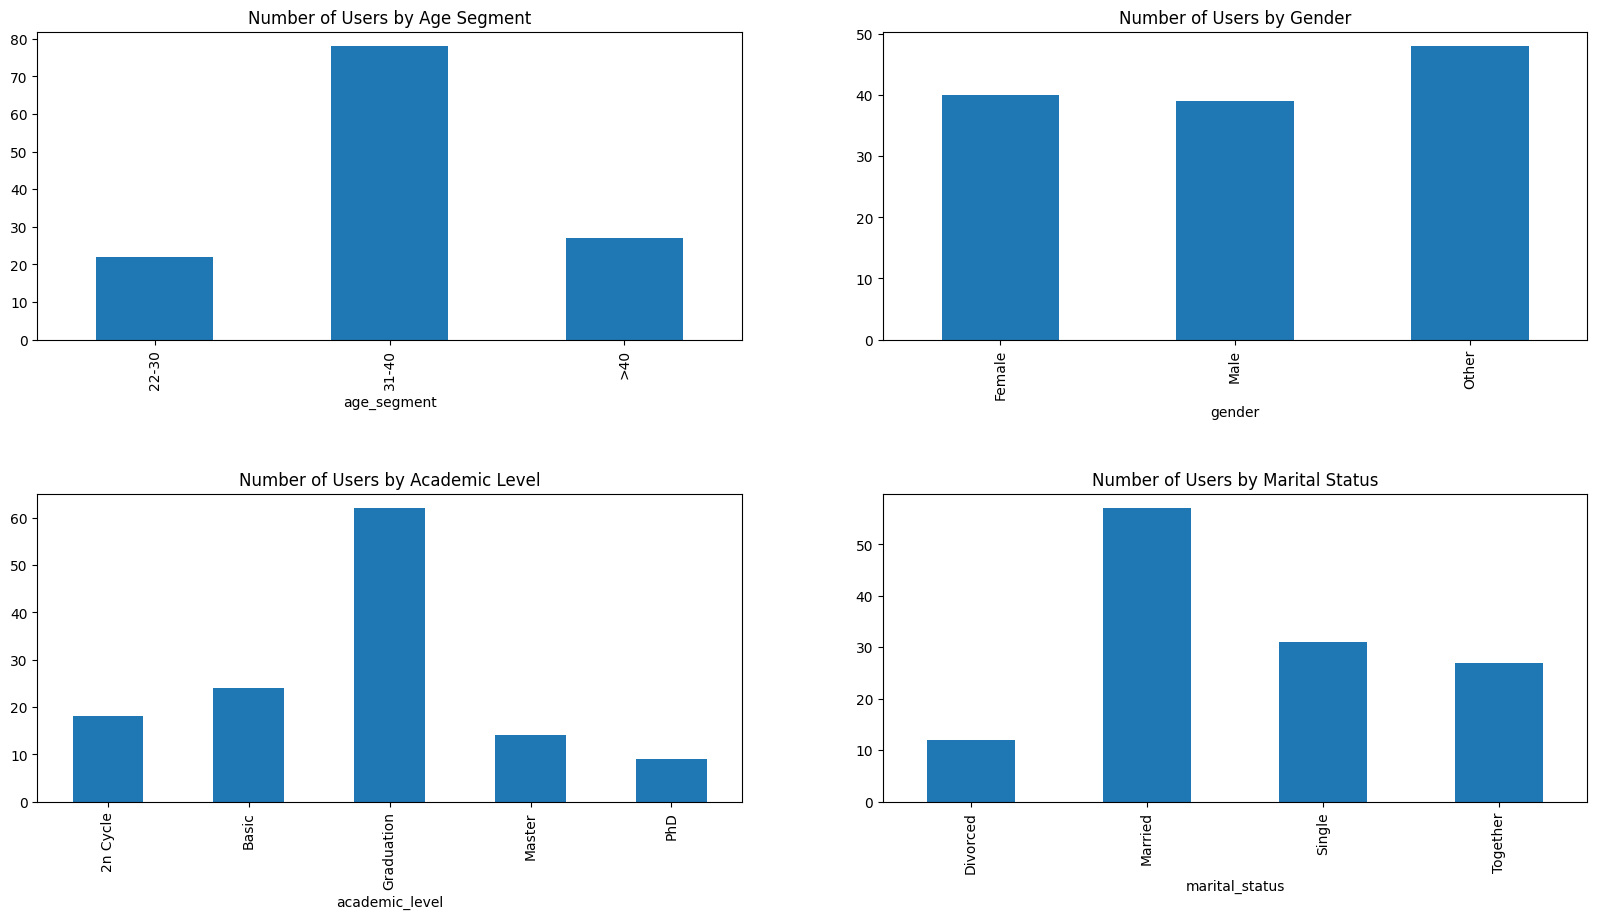

In [495]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

income[income['income_segment'] == '<20K'].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
income[income['income_segment'] == '<20K'].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
income[income['income_segment'] == '<20K'].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
income[income['income_segment'] == '<20K'].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

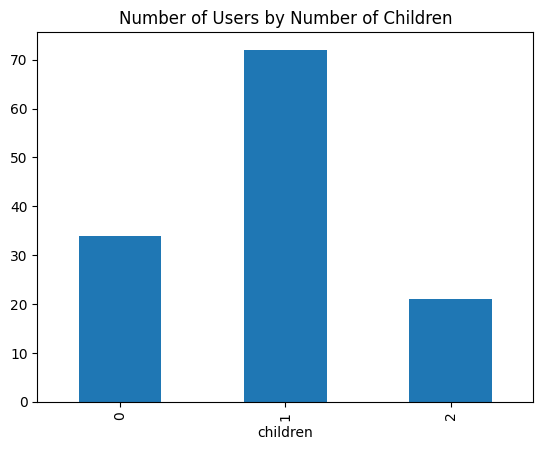

In [496]:
income[income['income_segment'] == '<20K'].groupby('children')['children'].count().plot(kind = 'bar', title = 'Number of Users by Number of Children');

In [497]:
# Filter data for <20K income segment
income_20K = income[income['income_segment'] == '<20K']

# Calculate mean spending for each category
mean_spending_20K = income_20K[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_20K, x = mean_spending_20K.index, y = mean_spending_20K.values, labels = {'y': 'Average Spending'}, title = 'Average Spending in <20K Income Segment')
fig.show()

In [498]:
# Calculate mean spending for each purchase
mean_spending_20K = income_20K[['num_catalog_purchases', 'num_store_purchases', 'num_web_purchases']].mean()

# Create bar plot
fig = px.bar(mean_spending_20K, x = mean_spending_20K.index, y = mean_spending_20K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Kind of Purchase in <20K Income Segment')
fig.show()

#### INCOME 20-40K

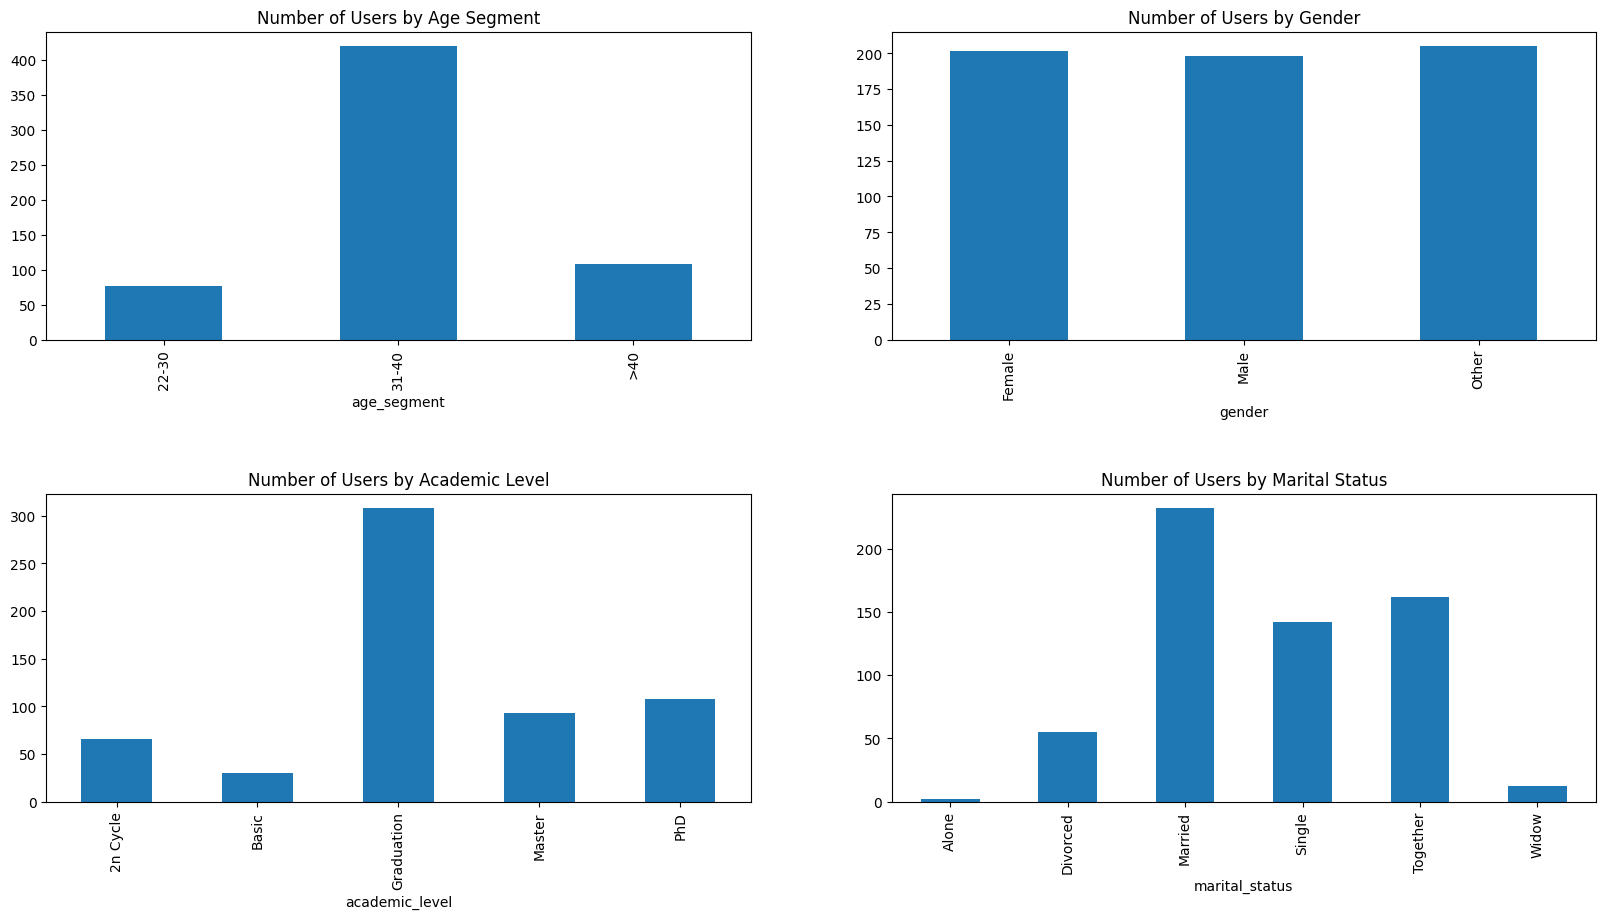

In [499]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

income[income['income_segment'] == '20-40K'].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
income[income['income_segment'] == '20-40K'].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
income[income['income_segment'] == '20-40K'].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
income[income['income_segment'] == '20-40K'].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

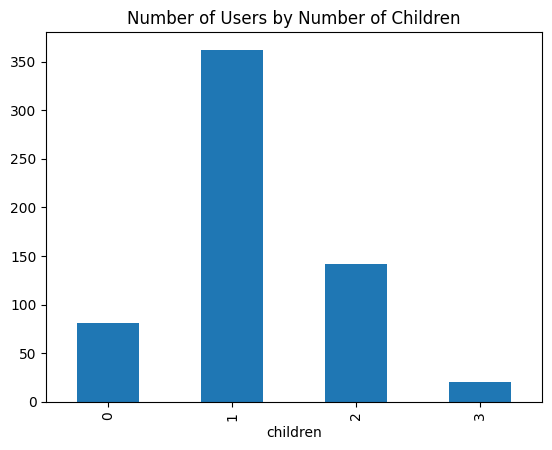

In [500]:
income[income['income_segment'] == '20-40K'].groupby('children')['children'].count().plot(kind = 'bar', title = 'Number of Users by Number of Children');

In [501]:
# Filter data for 20-40K income segment
income_20_40K = income[income['income_segment'] == '20-40K']

# Calculate mean spending for each category
mean_spending_20_40K = income_20_40K[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_20_40K, x = mean_spending_20_40K.index, y = mean_spending_20_40K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Spending in 20-40K Income Segment')
fig.show()

In [502]:
# Calculate mean spending for each purchase
mean_spending_20_40K = income_20_40K[['num_catalog_purchases', 'num_store_purchases', 'num_web_purchases']].mean()

# Create bar plot
fig = px.bar(mean_spending_20_40K, x = mean_spending_20_40K.index, y = mean_spending_20_40K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Kind of Purchase in <20K Income Segment')
fig.show()

#### INCOME 40-60K

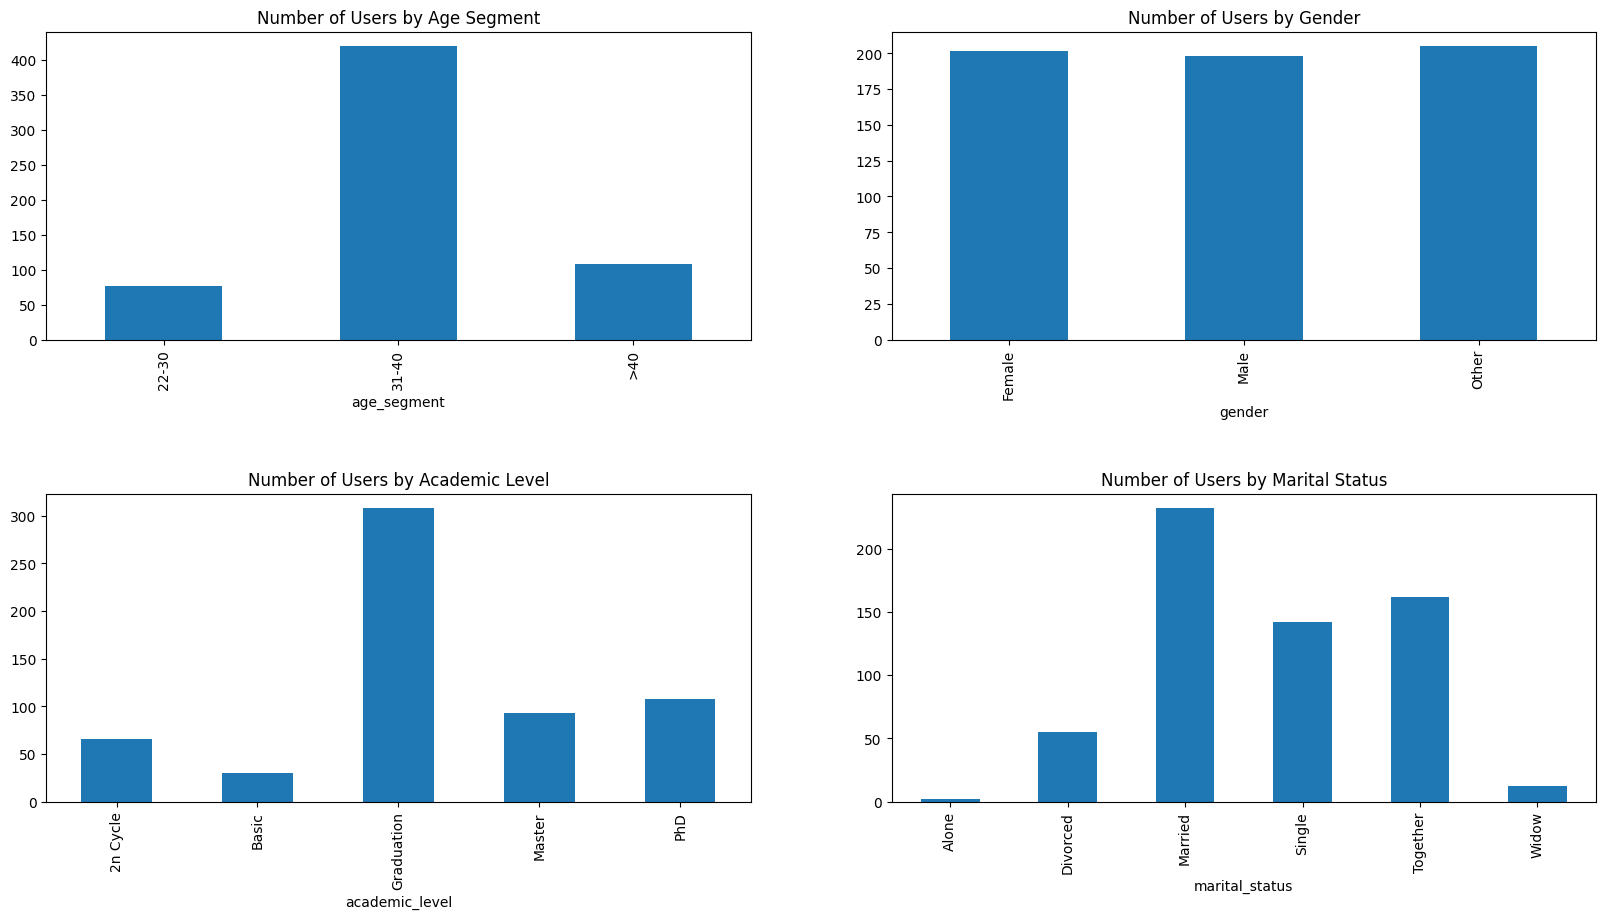

In [503]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

income[income['income_segment'] == '20-40K'].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
income[income['income_segment'] == '20-40K'].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
income[income['income_segment'] == '20-40K'].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
income[income['income_segment'] == '20-40K'].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

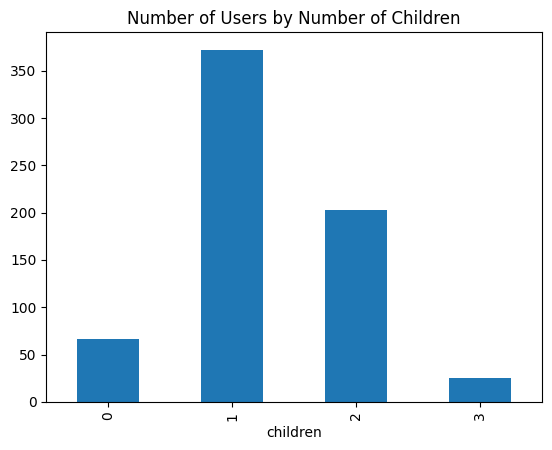

In [504]:
income[income['income_segment'] == '40-60K'].groupby('children')['children'].count().plot(kind = 'bar', title = 'Number of Users by Number of Children');

In [505]:
# Filter data for 40-60K income segment
income_40_60K = income[income['income_segment'] == '40-60K']

# Calculate mean spending for each category
mean_spending_40_60K = income_40_60K[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_40_60K, x = mean_spending_40_60K.index, y = mean_spending_40_60K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Spending in 40-60K Income Segment')
fig.show()

In [506]:
# Calculate mean spending for each purchase
mean_spending_40_60K = income_40_60K[['num_catalog_purchases', 'num_store_purchases', 'num_web_purchases']].mean()

# Create bar plot
fig = px.bar(mean_spending_40_60K, x = mean_spending_40_60K.index, y = mean_spending_40_60K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Kind of Purchase in 40-60K Income Segment')
fig.show()

#### INCOME 60-80K

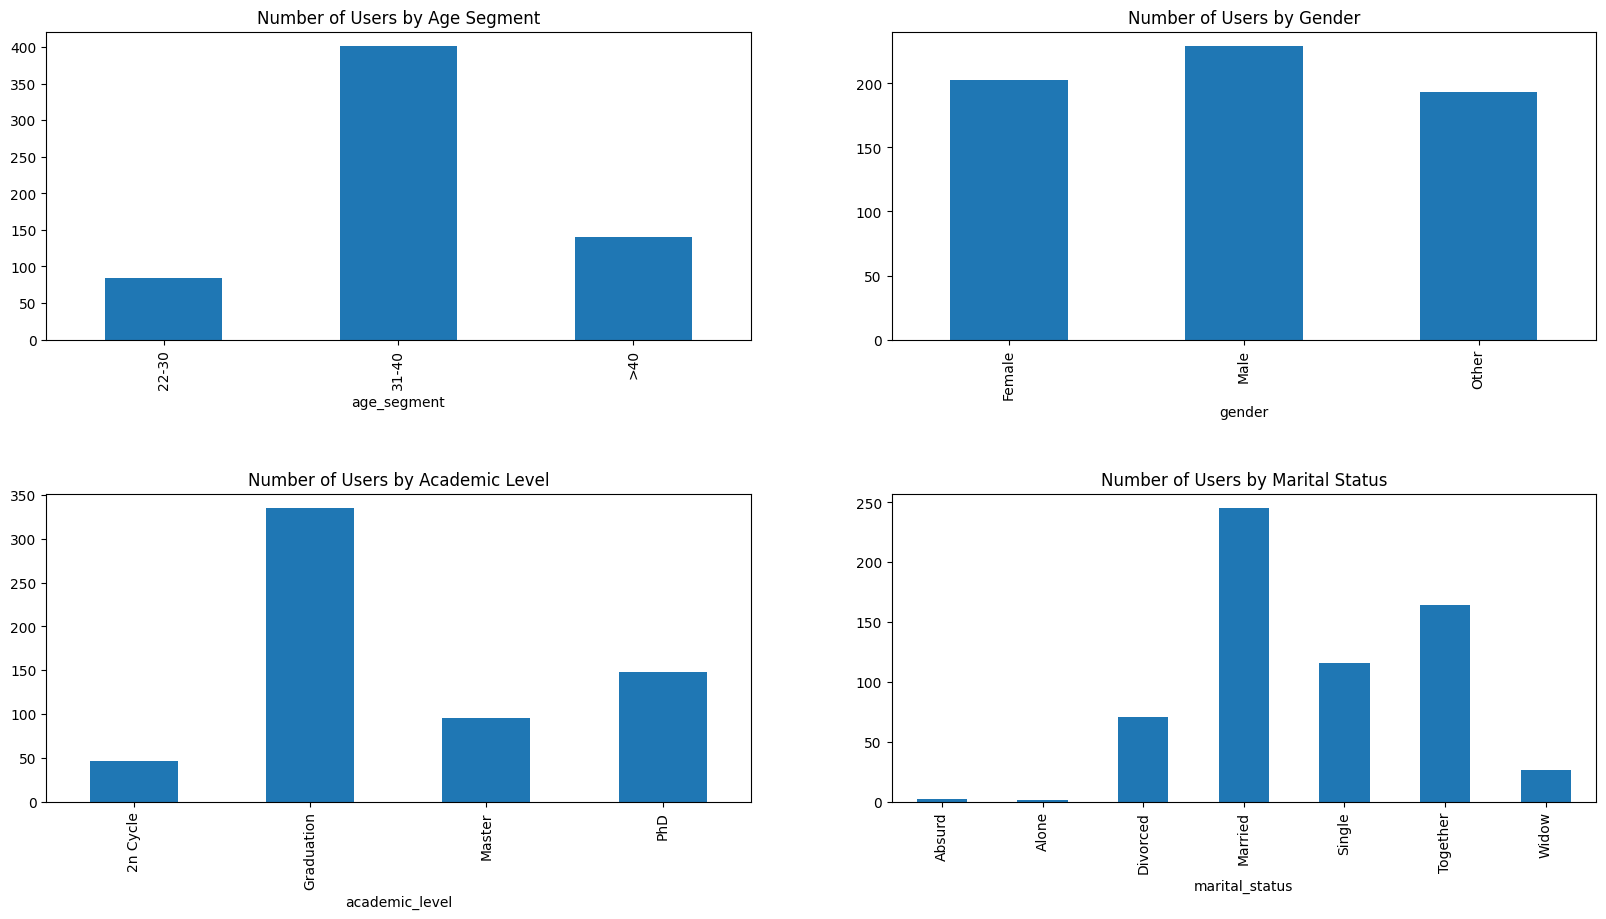

In [507]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

income[income['income_segment'] == '60-80K'].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
income[income['income_segment'] == '60-80K'].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
income[income['income_segment'] == '60-80K'].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
income[income['income_segment'] == '60-80K'].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

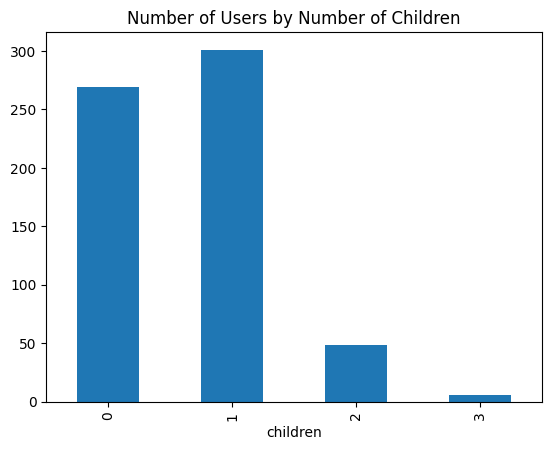

In [508]:
income[income['income_segment'] == '60-80K'].groupby('children')['children'].count().plot(kind = 'bar', title = 'Number of Users by Number of Children');

In [509]:
# Filter data for 60-80K income segment
income_60_80K = income[income['income_segment'] == '60-80K']

# Calculate mean spending for each category
mean_spending_60_80K = income_60_80K[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_60_80K, x = mean_spending_60_80K.index, y = mean_spending_60_80K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Spending in 60-80K Income Segment')
fig.show()

In [510]:
# Calculate mean spending for each purchase
mean_spending_60_80K = income_60_80K[['num_catalog_purchases', 'num_store_purchases', 'num_web_purchases']].mean()

# Create bar plot
fig = px.bar(mean_spending_60_80K, x = mean_spending_60_80K.index, y = mean_spending_60_80K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Kind of Purchase in 60-80K Income Segment')
fig.show()

#### INCOME >80K

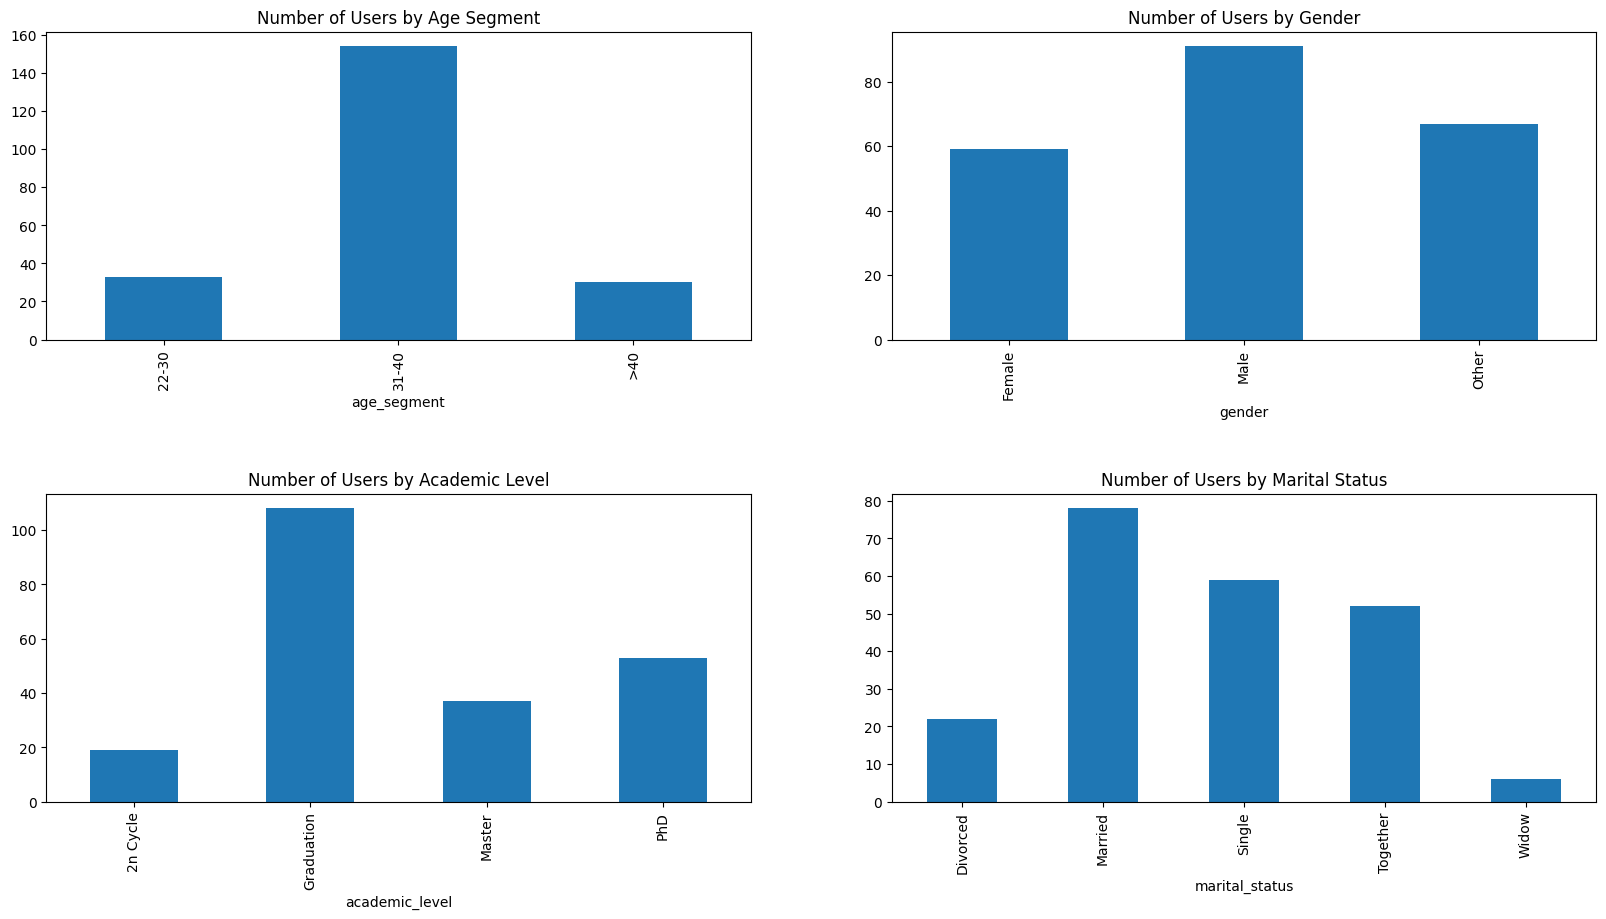

In [511]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

income[income['income_segment'] == '>80K'].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
income[income['income_segment'] == '>80K'].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
income[income['income_segment'] == '>80K'].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
income[income['income_segment'] == '>80K'].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

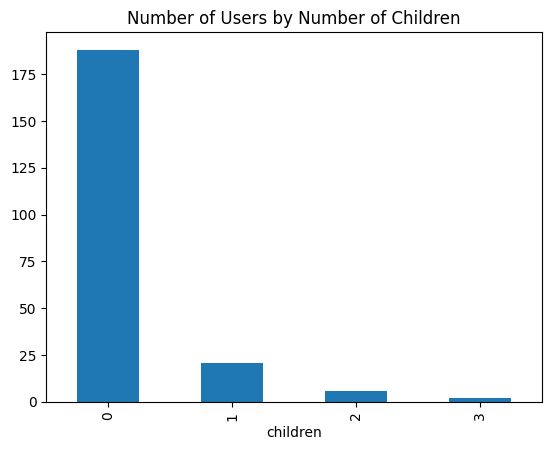

In [512]:
income[income['income_segment'] == '>80K'].groupby('children')['children'].count().plot(kind = 'bar', title = 'Number of Users by Number of Children');

In [513]:
# Filter data for >80K income segment
income_80K = income[income['income_segment'] == '>80K']

# Calculate mean spending for each category
mean_spending_80K = income_80K[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_80K, x = mean_spending_80K.index, y = mean_spending_80K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Spending in >80K Income Segment')
fig.show()

In [514]:
# Calculate mean spending for each purchase
mean_spending_80K = income_80K[['num_catalog_purchases', 'num_store_purchases', 'num_web_purchases']].mean()

# Create bar plot
fig = px.bar(mean_spending_80K, x = mean_spending_80K.index, y = mean_spending_80K.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Kind of Purchase in >80K Income Segment')
fig.show()

### EDA - NUMBER OF CHILDREN

In [515]:
cols = ['income_segment', 'age_segment', 'gender', 'children', 'academic_level', 'marital_status', 'food', 'jewellery', 'liquor', 'num_catalog_purchases', 'num_deals_purchases', 'num_store_purchases', 'num_web_purchases']
children = data_eda[cols]
children.head()

,income_segment,age_segment,gender,children,academic_level,marital_status,food,jewellery,liquor,num_catalog_purchases,num_deals_purchases,num_store_purchases,num_web_purchases
831,60-80K,22-30,Other,1,Graduation,Married,163.0,152.0,790.0,5.0,7.0,8.0,11.0
1132,60-80K,31-40,Male,1,Graduation,Married,145.0,90.0,503.0,2.0,2.0,10.0,7.0
301,60-80K,>40,Female,0,2n Cycle,Single,885.0,121.0,312.0,9.0,1.0,13.0,4.0
1101,40-60K,31-40,Female,1,Master,Together,40.0,12.0,15.0,0.0,2.0,3.0,2.0
2888,40-60K,22-30,Male,1,PhD,Divorced,547.0,176.0,942.0,5.0,11.0,9.0,8.0


#### CHILDREN - 0

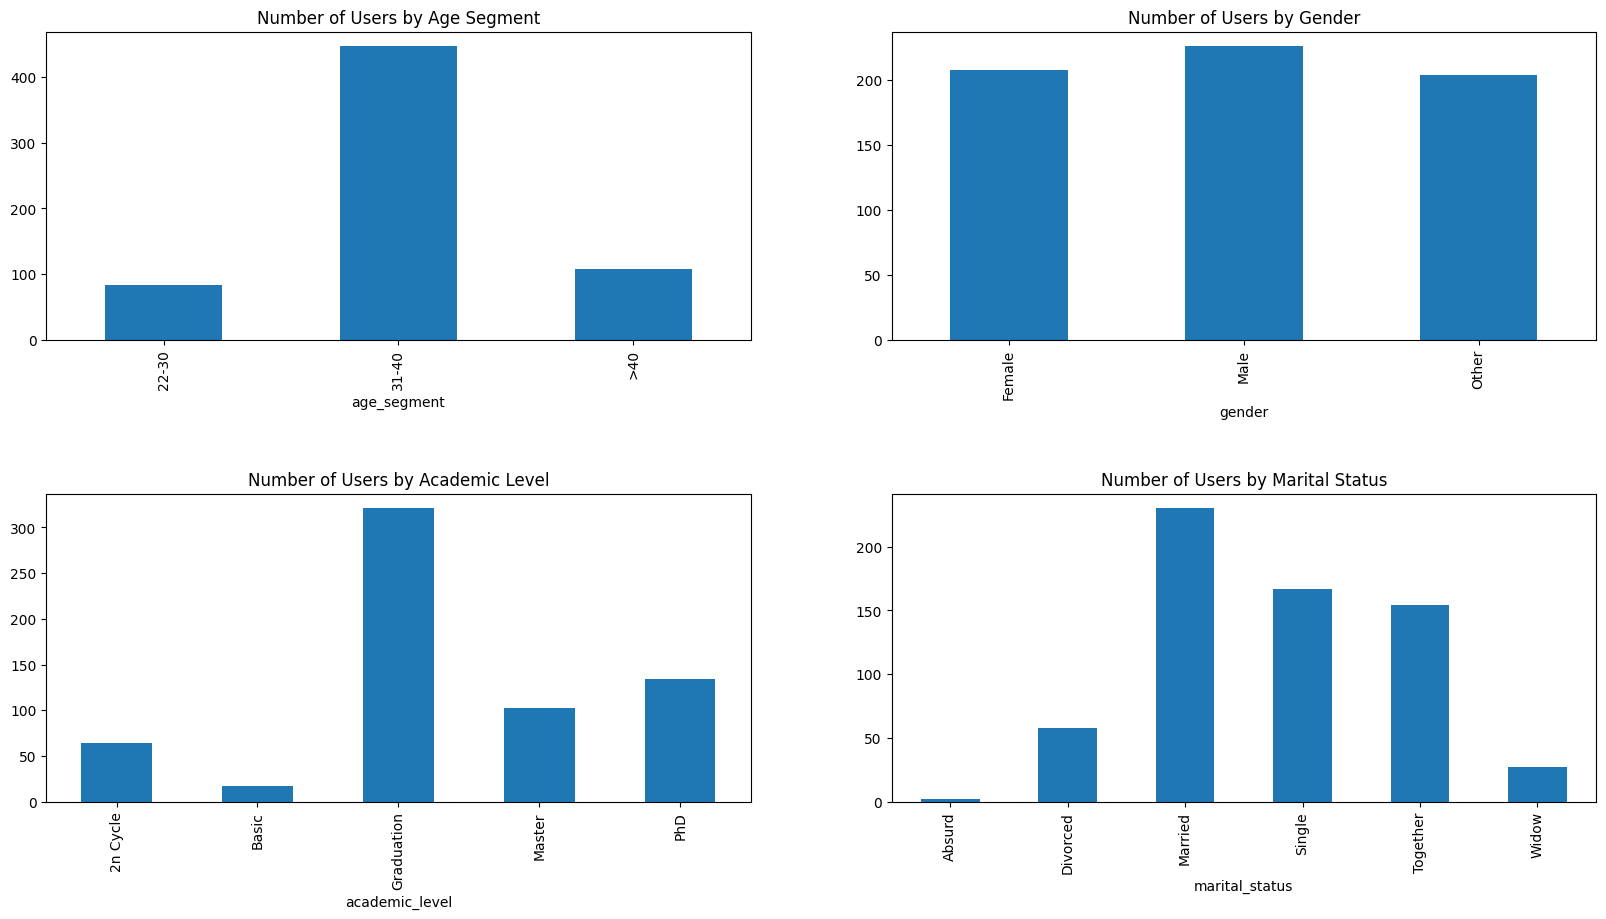

In [516]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

children[children['children'] == 0].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
children[children['children'] == 0].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
children[children['children'] == 0].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
children[children['children'] == 0].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

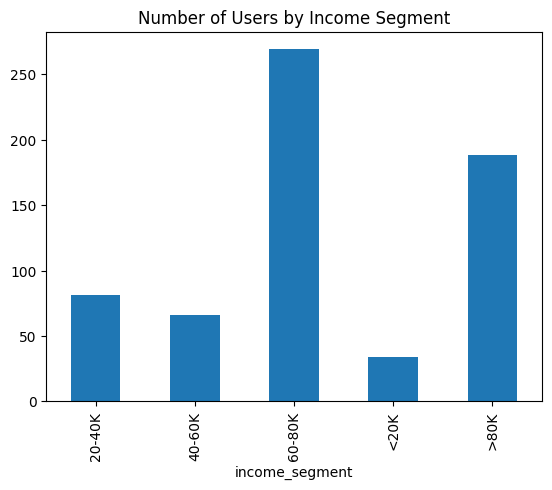

In [517]:
children[children['children'] == 0].groupby('income_segment')['income_segment'].count().plot(kind = 'bar', title = 'Number of Users by Income Segment');

In [518]:
# Filter data for no child
children_0 = children[children['children'] == 0]

# Calculate mean spending for each category
mean_spending_0 = children_0[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_0, x = mean_spending_0.index, y = mean_spending_0.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Spending for People who do not have Child')
fig.show()

In [519]:
# Calculate mean spending for each purchase
mean_spending_0 = children_0[['num_catalog_purchases', 'num_store_purchases', 'num_web_purchases']].mean()

# Create bar plot
fig = px.bar(mean_spending_0, x = mean_spending_0.index, y = mean_spending_0.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Kind of Purchase for People who do not have Child')
fig.show()

#### CHILDREN - 1

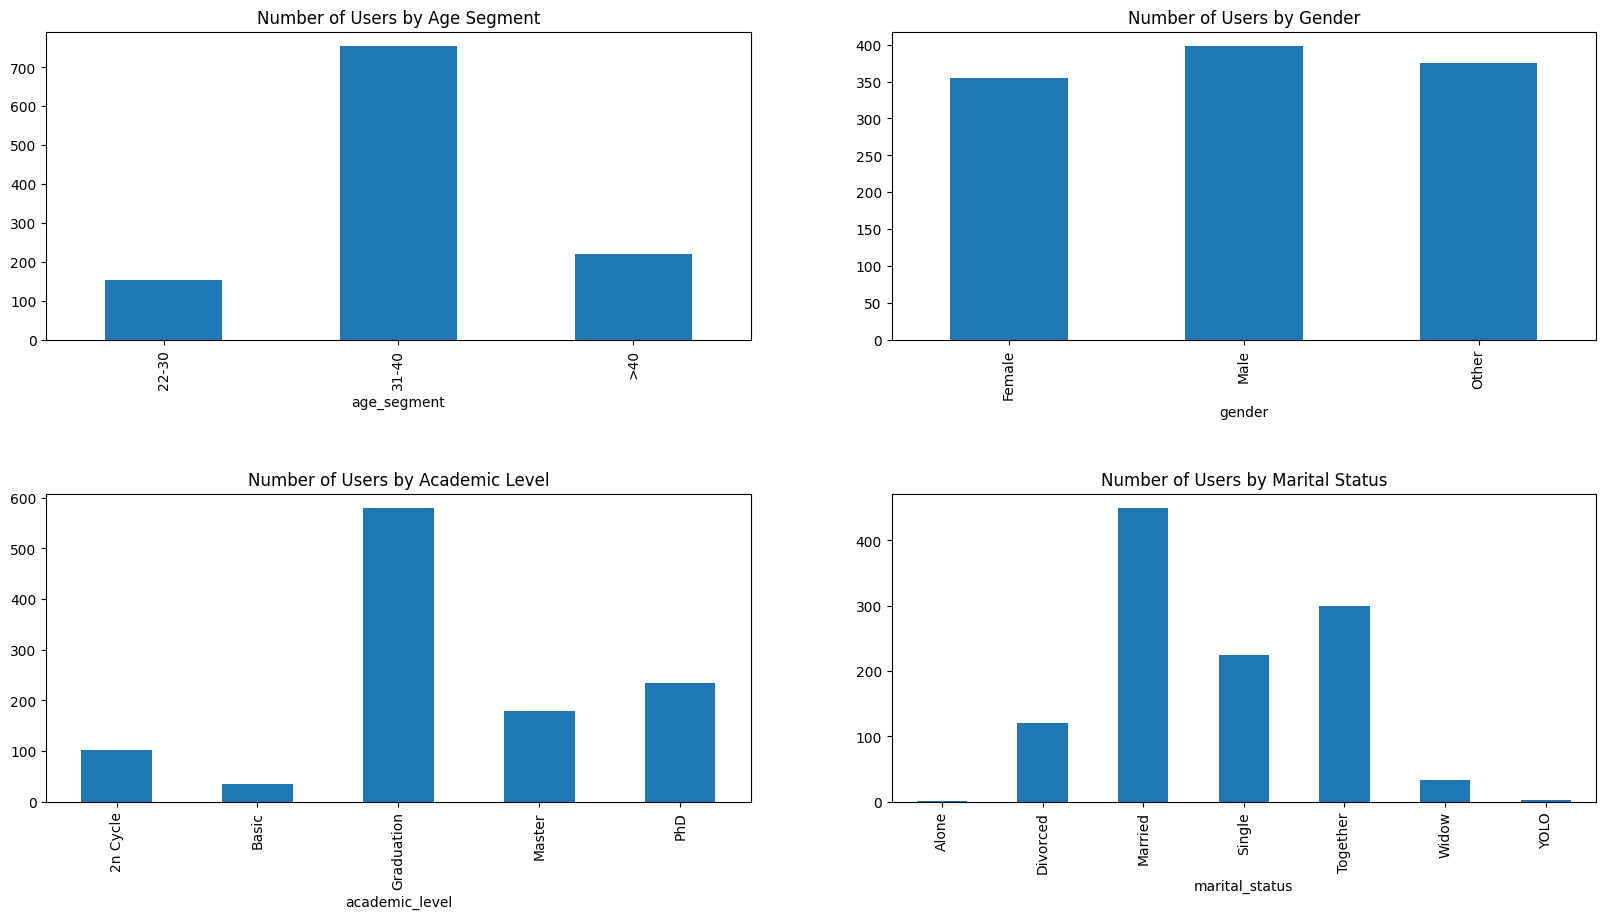

In [520]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

children[children['children'] == 1].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
children[children['children'] == 1].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
children[children['children'] == 1].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
children[children['children'] == 1].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

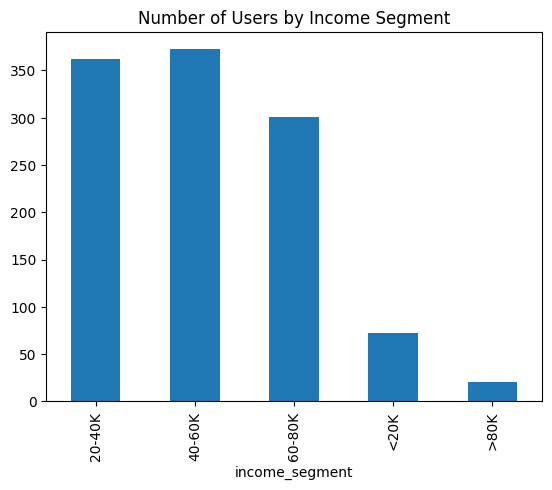

In [521]:
children[children['children'] == 1].groupby('income_segment')['income_segment'].count().plot(kind = 'bar', title = 'Number of Users by Income Segment');

In [522]:
# Filter data for 1 child
children_1 = children[children['children'] == 1]

# Calculate mean spending for each category
mean_spending_1 = children_1[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_1, x = mean_spending_1.index, y = mean_spending_1.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Spending of People who have 1 child')
fig.show()

In [523]:
# Calculate mean spending for each purchase
mean_spending_1 = children_1[['num_catalog_purchases', 'num_store_purchases', 'num_web_purchases']].mean()

# Create bar plot
fig = px.bar(mean_spending_1, x = mean_spending_1.index, y = mean_spending_1.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Kind of Purchase of People who have 1 Child')
fig.show()

#### CHILDREN - 2

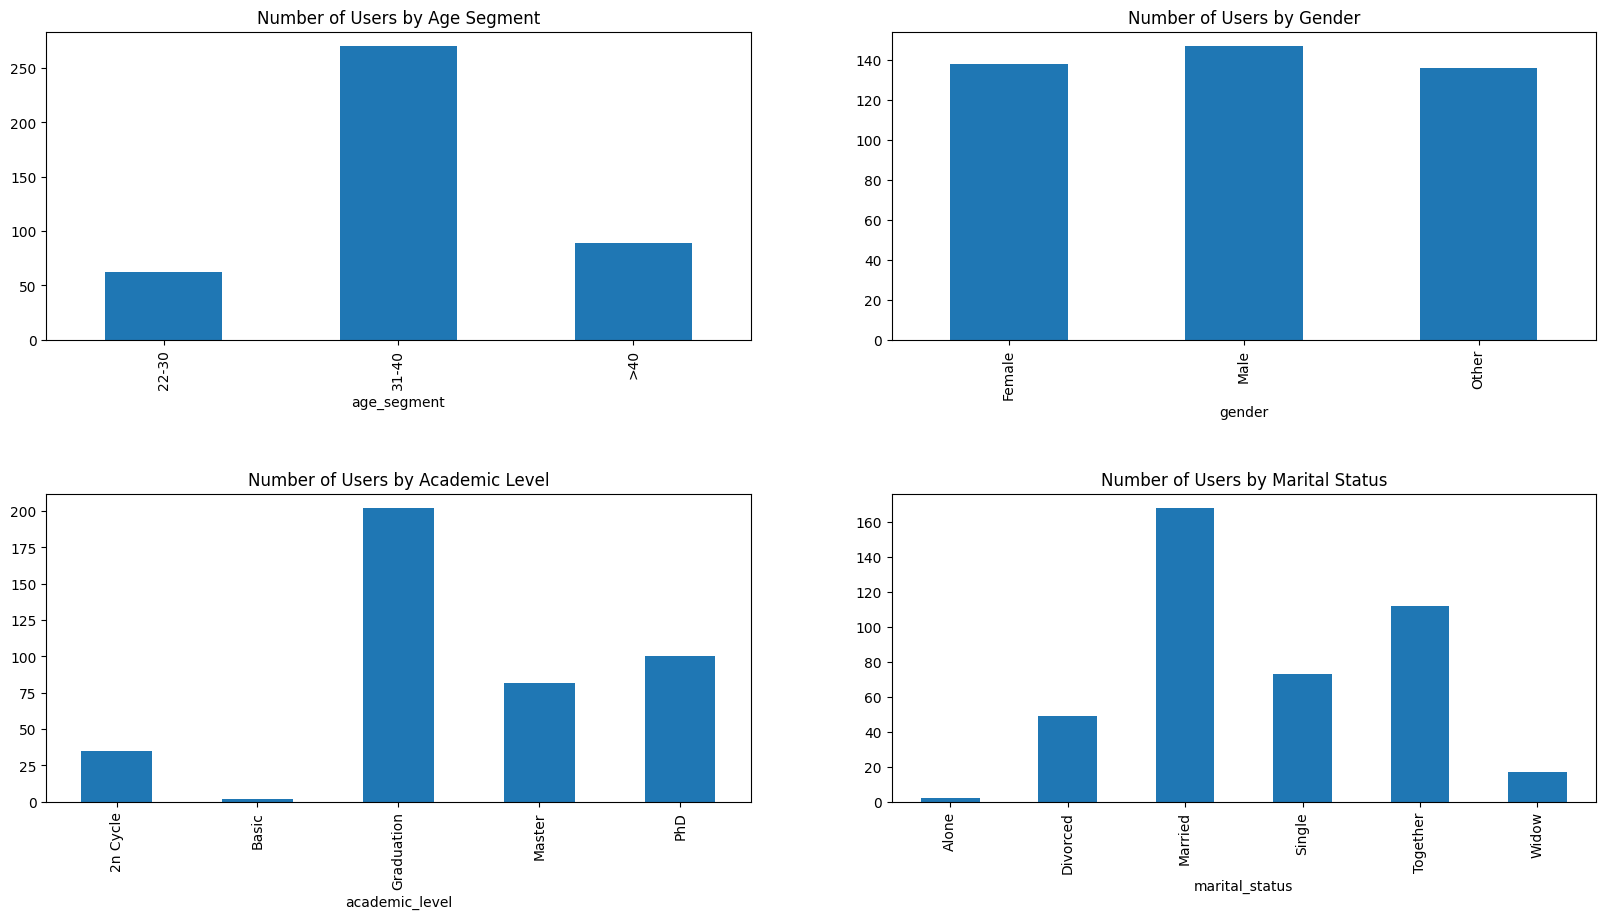

In [524]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

children[children['children'] == 2].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
children[children['children'] == 2].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
children[children['children'] == 2].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
children[children['children'] == 2].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

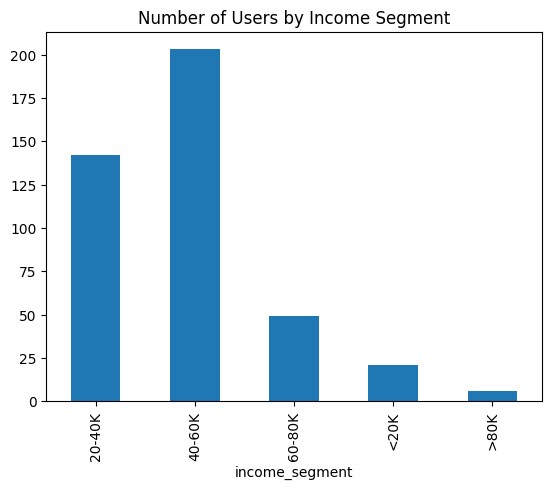

In [525]:
children[children['children'] == 2].groupby('income_segment')['income_segment'].count().plot(kind = 'bar', title = 'Number of Users by Income Segment');

In [526]:
# Filter data for 2 children
children_2 = children[children['children'] == 2]

# Calculate mean spending for each category
mean_spending_2 = children_2[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_2, x = mean_spending_2.index, y = mean_spending_2.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Spending of People who have 2 children')
fig.show()

In [527]:
# Calculate mean spending for each purchase
mean_spending_2 = children_2[['num_catalog_purchases', 'num_store_purchases', 'num_web_purchases']].mean()

# Create bar plot
fig = px.bar(mean_spending_2, x = mean_spending_2.index, y = mean_spending_2.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Kind of Purchase of People who have 2 Children')
fig.show()

#### CHILDREN - 3

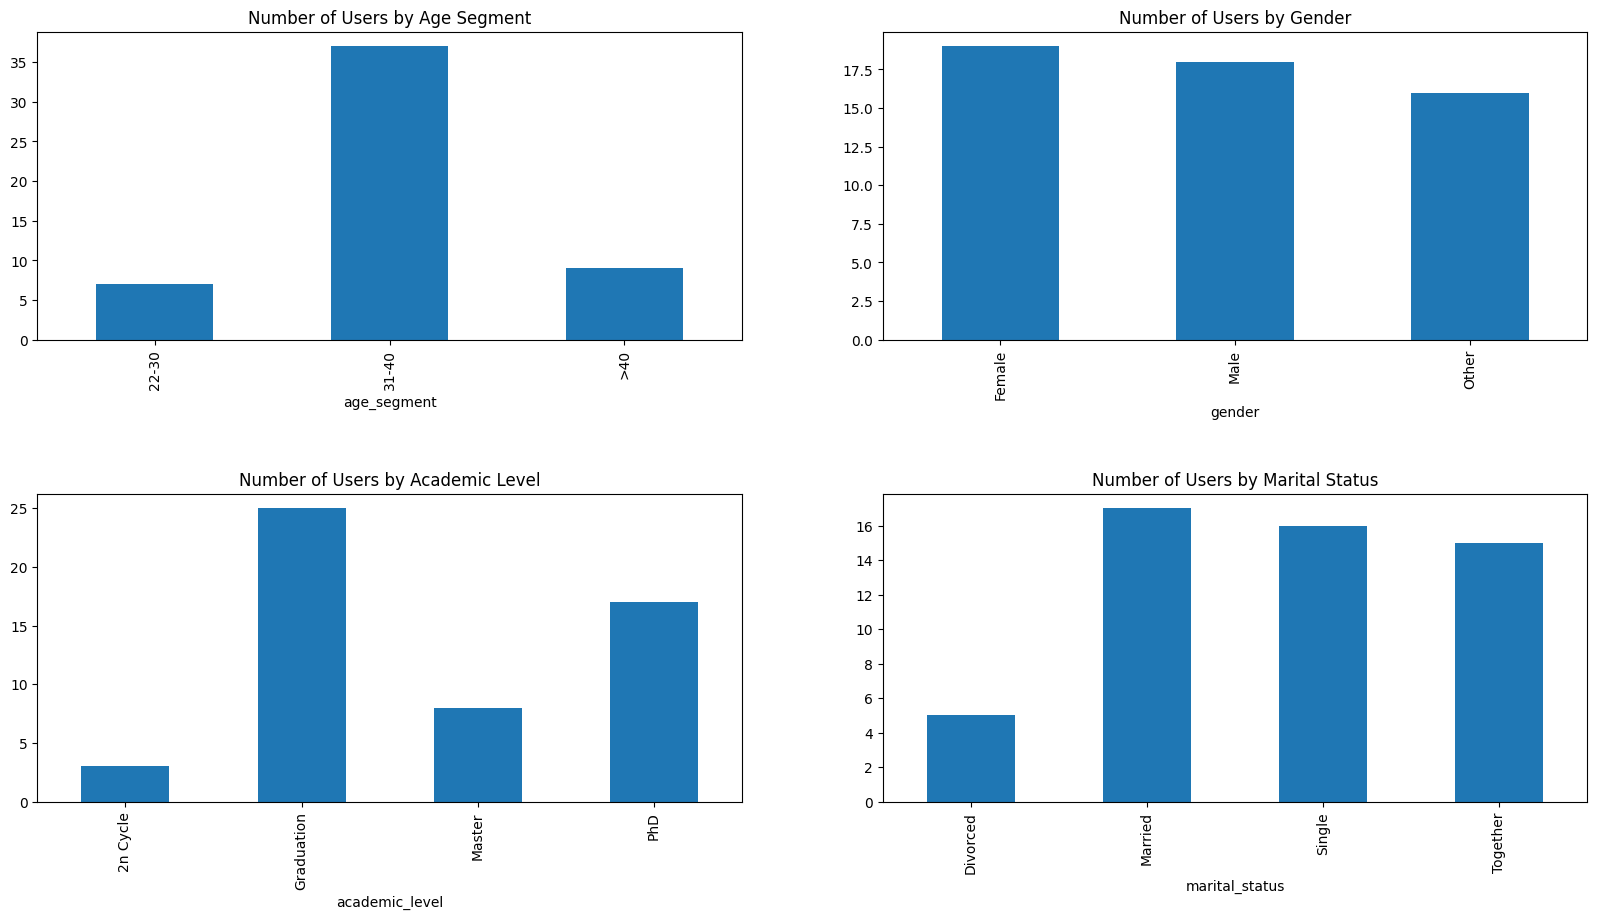

In [528]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax.ravel()

children[children['children'] == 3].groupby('age_segment')['age_segment'].count().plot(kind = 'bar', title = 'Number of Users by Age Segment', ax = ax[0, 0])
children[children['children'] == 3].groupby('gender')['gender'].count().plot(kind = 'bar', title = 'Number of Users by Gender', ax = ax[0, 1])
children[children['children'] == 3].groupby('academic_level')['academic_level'].count().plot(kind = 'bar', title = 'Number of Users by Academic Level', ax = ax[1, 0])
children[children['children'] == 3].groupby('marital_status')['marital_status'].count().plot(kind = 'bar', title = 'Number of Users by Marital Status', ax = ax[1, 1])

plt.subplots_adjust(hspace = 0.5)
plt.show()

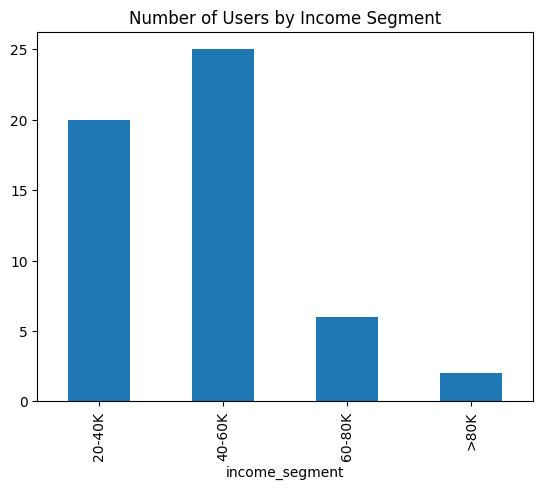

In [529]:
children[children['children'] == 3].groupby('income_segment')['income_segment'].count().plot(kind = 'bar', title = 'Number of Users by Income Segment');

In [530]:
# Filter data for 3 children
children_3 = children[children['children'] == 3]

# Calculate mean spending for each category
mean_spending_3 = children_1[['liquor', 'food', 'jewellery']].mean()

# Create bar plot
fig = px.bar(mean_spending_3, x = mean_spending_3.index, y = mean_spending_3.values, labels = {'x': 'Category', 'y': 'Average Spending'}, title = 'Average Spending of People who have 3 Children')
fig.show()

### EDA - AGE SEGMENT

In [531]:
# Calculate average spending for each age group
age_group = data_eda.groupby('age_segment')[['vegetables', 'seafood', 'pork', 'candy']].mean().reset_index()

# Plot grouped bar chart for new age groups
fig = px.bar(age_group, x = 'age_segment', y = ['vegetables', 'seafood', 'pork', 'candy'],
            barmode = 'group',
            labels = {'value': 'Average Spending', 'age_group_new': 'Age Group'},
            title = 'Correlation between Age Group and Spending on Food Categories')
fig.show()

In [532]:
# Calculate the number of purchases through different channels
purchase_channels = data_eda[['num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']].sum().reset_index()
purchase_channels.columns = ['Channel', 'Number of Purchases']

# Plot the number of purchases through different channels
fig = px.bar(purchase_channels, x = 'Channel', y = 'Number of Purchases',
             labels = {'Number of Purchases': 'Number of Purchases', 'Channel': 'Purchase Channel'},
             title = 'Number of Purchases through Different Channels')
fig.show()

### EDA - PROMOTION

In [533]:
data_tmp = {
    'Promo_10': data_eda['promo_10'],
    'Promo_20': data_eda['promo_20'],
    'Promo_30': data_eda['promo_30'],
    'Promo_40': data_eda['promo_40'],
    'Promo_50': data_eda['promo_50']
}
df_promo = pd.DataFrame(data_tmp)

count_ones = df_promo.apply(lambda x: (x == 1).sum())

fig = px.bar(count_ones, x = count_ones.index, y = count_ones.values, labels={'x': 'Column', 'y': 'Count'}, title = 'Number of Purchases using Promotion')
fig.show()

In [534]:
# Calculate average promotion usage for each income group
income_promo_means = data_eda.groupby('income_segment')[['promo_10', 'promo_20', 'promo_30', 'promo_40', 'promo_50']].mean().reset_index()

# Plot grouped bar chart for income groups and promotion usage
fig = px.bar(income_promo_means, x = 'income_segment', y = ['promo_10', 'promo_20', 'promo_30', 'promo_40', 'promo_50'],
            barmode = 'group',
            labels = {'value': 'Average Promotion Usage', 'income_segment': 'Income Group'},
            title = 'Correlation between Income Group and Promotion Usage')
fig.show()

In [535]:
# Calculate promotion usage for each age group
promotion_columns = ['promo_10', 'promo_20', 'promo_30', 'promo_40', 'promo_50']
data_promotion = data_eda.groupby('age_segment')[promotion_columns].mean().reset_index()

# Visualize the data
fig = px.bar(data_promotion, x = 'age_segment', y = promotion_columns, barmode = 'group',
             title='Promotion Usage by Age Group',
             labels={'value': 'Promotion Usage', 'age_group': 'Age Group'})
fig.show()

# IV. DATA RFM

In [536]:
data_rfm = data.copy()

In [537]:
# Convert all object data type columns to categorical features
for col in data_rfm.select_dtypes(include = ['object']).columns:
    data_rfm[col] = data_rfm[col].astype('category')

# Use one-hot encoding to convert categorical features into numerical features
data_rfm = pd.get_dummies(data_rfm, drop_first = True)

for col in data_rfm.select_dtypes(include = ['bool']).columns:
    data_rfm[col] = data_rfm[col].astype('int')

# Display the first few rows of the encoded dataframe
data_rfm.head()

,ID,Year_Of_Birth,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
831,1001.0,1994.0,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,28.0,...,0,0,0,0,0,0,0,0,1,0
1132,1002.0,1989.0,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,6.0,...,0,0,0,0,0,0,1,0,0,0
301,1005.0,1978.0,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,37.0,...,1,0,0,0,0,0,0,1,0,0
1101,1006.0,1987.0,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,16.0,...,0,1,0,0,0,0,0,1,0,0
2888,1007.0,1996.0,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,58.0,...,0,0,0,0,0,0,0,0,0,1


In [538]:
data_rfm = data_rfm.drop(columns = ['Gender_Other'], axis = 1)
data_rfm.rename(columns = {'Gender_Male' : 'Gender'}, inplace = True)

In [539]:
data_rfm['Weekday'] = data_rfm['Registration_Time'].dt.day_name()

In [540]:
data_rfm['food']= data_rfm['Vegetables'] + data_rfm['Pork']+data_rfm['Seafood'] + data_rfm['Candy']
data_rfm['revenue']= data_rfm['food']+data_rfm['Jewellery']+data_rfm['Liquor']

In [541]:
data_rfm.columns.to_list()

['ID',
 'Year_Of_Birth',
 'Income',
 'Registration_Time',
 'Recency',
 'Liquor',
 'Vegetables',
 'Pork',
 'Seafood',
 'Candy',
 'Jewellery',
 'Num_Deals_Purchases',
 'Num_Web_Purchases',
 'Num_Catalog_Purchases',
 'Num_Store_Purchases',
 'Num_Web_Visits_Month',
 'Promo_30',
 'Promo_40',
 'Promo_50',
 'Promo_10',
 'Promo_20',
 'Complain',
 'Total_Purchase',
 'Children',
 'Year_Month',
 'Year',
 'Month',
 'Day',
 'Age',
 'Academic_Level_Basic',
 'Academic_Level_Graduation',
 'Academic_Level_Master',
 'Academic_Level_PhD',
 'Gender',
 'Payment_Method_Cash',
 'Payment_Method_Mobile',
 'Payment_Method_Online',
 'Payment_Method_Other',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO',
 'Weekday_Monday',
 'Weekday_Saturday',
 'Weekday_Sunday',
 'Weekday_Thursday',
 'Weekday_Tuesday',
 'Weekday_Wednesday',
 'Weekday',
 'food',
 'revenue']

In [542]:
# Rename all columns
old_cols = data_rfm.columns
new_cols = list(map(lambda x: inflection.underscore(x), old_cols))

data_rfm.columns = new_cols
data_rfm.head()

,id,year_of_birth,income,registration_time,recency,liquor,vegetables,pork,seafood,candy,...,marital_status_yolo,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weekday,food,revenue
831,1001.0,1994.0,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,28.0,...,0,0,0,0,0,1,0,Tuesday,163.0,1105.0
1132,1002.0,1989.0,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,6.0,...,0,0,0,1,0,0,0,Sunday,145.0,738.0
301,1005.0,1978.0,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,37.0,...,0,0,0,0,1,0,0,Thursday,885.0,1318.0
1101,1006.0,1987.0,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,16.0,...,0,0,0,0,1,0,0,Thursday,40.0,67.0
2888,1007.0,1996.0,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,58.0,...,0,0,0,0,0,0,1,Wednesday,547.0,1665.0


In [543]:
data_rfm = data_rfm[data_rfm['id'] != 6709]

# V. FEATURE SELECTION


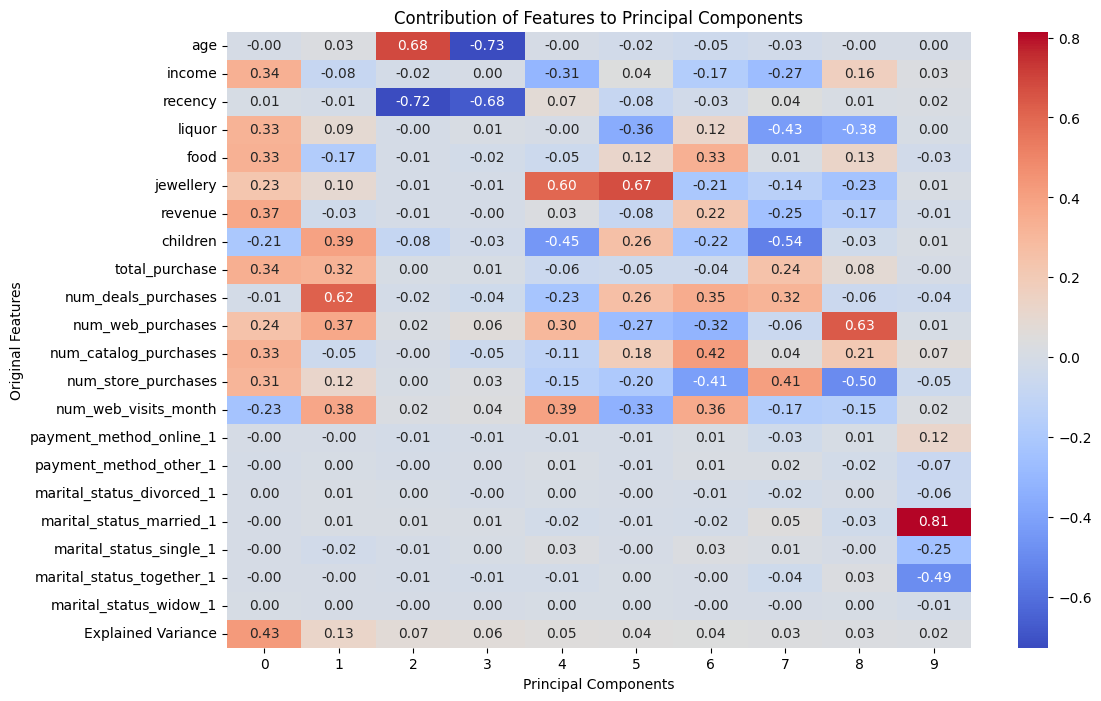

In [544]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical features
numerical_features = ['age', 'income', 'recency', 'liquor', 'food', 'jewellery', 'revenue', 'children',
                      'total_purchase','num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month']
categorical_features = ['payment_method_online', 'payment_method_other', 'marital_status_divorced', 'marital_status_married',
                        'marital_status_single', 'marital_status_together', 'marital_status_widow']

# Preprocessing transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
data_preprocessed = preprocessor.fit_transform(data_rfm)

# Apply PCA
optimal_components = 10
pca = PCA(n_components = optimal_components)
data_pca = pca.fit_transform(data_preprocessed)

# Get feature names after preprocessing
feature_names = numerical_features + preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()

# Create a DataFrame to see which original features contribute to each principal component
pca_df = pd.DataFrame(pca.components_, columns=feature_names)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Add explained variance to the DataFrame for better understanding
pca_df_with_variance = pd.DataFrame(pca.components_, columns=feature_names)
pca_df_with_variance['Explained Variance'] = explained_variance

# Plot the contributions of the original features to the principal components
plt.figure(figsize=(12, 8))
sns.heatmap(pca_df_with_variance.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Contribution of Features to Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

# Display the explained variance
# print("Explained variance by each principal component:")
# print(explained_variance)

# Display the principal components and their contributions
# print("Principal components and their contributions:")
# print(pca_df_with_variance)


In [545]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Function to apply clustering and compute metrics
def evaluate_clustering(X, clustering_algo):
    clustering_algo.fit(X)
    labels = clustering_algo.labels_
    if len(set(labels)) == 1:
        return None, None, None  # Return None if there is only one cluster
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Evaluate KMeans
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans_metrics = evaluate_clustering(data_pca, kmeans)

# Evaluate Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_metrics = evaluate_clustering(data_pca, hierarchical)

# Evaluate DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_pca)
labels_dbscan = dbscan.labels_

# Calculate DBSCAN metrics only if there are at least 2 clusters
if len(set(labels_dbscan)) > 1:
    dbscan_metrics = (
        silhouette_score(data_pca, labels_dbscan),
        davies_bouldin_score(data_pca, labels_dbscan),
        calinski_harabasz_score(data_pca, labels_dbscan)
    )
else:
    dbscan_metrics = ('Not applicable (only one cluster found)', ) * 3


# Prepare results
results = {
    'Clustering Method': ['KMeans', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_metrics[0], hierarchical_metrics[0], dbscan_metrics[0]],
    'Davies-Bouldin Index': [kmeans_metrics[1], hierarchical_metrics[1], dbscan_metrics[1]],
    'Calinski-Harabasz Index': [kmeans_metrics[2], hierarchical_metrics[2], dbscan_metrics[2]],
}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Clustering Methods Comparison", dataframe=results_df)

results_df


,Clustering Method,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,KMeans,0.231380,1.871537,759.203563
1,Hierarchical,0.179182,2.092810,680.697418
2,DBSCAN,-0.136329,1.193289,3.871123


# VI. CLUSTERING MODELS

In [546]:
RFM_Table = data_rfm[['id', 'age', 'income', 'recency', 'liquor', 'food', 'jewellery', 'revenue', 'children', 'total_purchase',
                      'marital_status_married', 'marital_status_single', 'marital_status_together']]
RFM_Table.head()

,id,age,income,recency,liquor,food,jewellery,revenue,children,total_purchase,marital_status_married,marital_status_single,marital_status_together
831,1001.0,30.0,61074.0,37.0,790.0,163.0,152.0,1105.0,1,31.0,1,0,0
1132,1002.0,35.0,60093.0,92.0,503.0,145.0,90.0,738.0,1,21.0,1,0,0
301,1005.0,46.0,79689.0,65.0,312.0,885.0,121.0,1318.0,0,27.0,0,1,0
1101,1006.0,37.0,41021.0,12.0,15.0,40.0,12.0,67.0,1,7.0,0,0,1
2888,1007.0,28.0,57333.0,55.0,942.0,547.0,176.0,1665.0,1,33.0,0,0,0


In [547]:
#Calculate Quantile for RFM
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
#segment RFM
RFM_Table['R_quartile'] = RFM_Table['recency'].apply(RScore, args=('recency', quantiles))
RFM_Table['F_quartile'] = RFM_Table['total_purchase'].apply(FMScore, args=('total_purchase', quantiles))
RFM_Table['M_quartile'] = RFM_Table['revenue'].apply(FMScore, args=('revenue', quantiles))

In [548]:
RFM_Table['RFM_Segment'] = RFM_Table.R_quartile.map(str)+RFM_Table.F_quartile.map(str)+RFM_Table.M_quartile.map(str)
RFM_Table['RFM_Score'] = RFM_Table[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
RFM_Table = RFM_Table.rename(columns={'total_purchase': 'frequency'})
RFM_Table = RFM_Table.rename(columns={'revenue': 'monetary'})
RFM_Table.head()



,id,age,income,recency,liquor,food,jewellery,monetary,children,frequency,marital_status_married,marital_status_single,marital_status_together,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
831,1001.0,30.0,61074.0,37.0,790.0,163.0,152.0,1105.0,1,31.0,1,0,0,2,1,1,211,4
1132,1002.0,35.0,60093.0,92.0,503.0,145.0,90.0,738.0,1,21.0,1,0,0,4,2,2,422,8
301,1005.0,46.0,79689.0,65.0,312.0,885.0,121.0,1318.0,0,27.0,0,1,0,3,1,1,311,5
1101,1006.0,37.0,41021.0,12.0,15.0,40.0,12.0,67.0,1,7.0,0,0,1,1,4,4,144,9
2888,1007.0,28.0,57333.0,55.0,942.0,547.0,176.0,1665.0,1,33.0,0,0,0,3,1,1,311,5


In [549]:
# Print the number of Best Customers
print("Best Customers: ", len(RFM_Table[RFM_Table['RFM_Segment'] == '111']))

# Print the number of Loyal Customers
print('Loyal Customers: ', len(RFM_Table[RFM_Table['F_quartile'] == 1]))

# Print the number of Big Spenders
print("Big Spenders: ", len(RFM_Table[RFM_Table['M_quartile'] == 1]))

# Print the number of Almost Lost Customers
print("Almost Lost: ", len(RFM_Table[RFM_Table['RFM_Segment'] == '134']))

# Print the number of Lost Customers
print('Lost Customers: ', len(RFM_Table[RFM_Table['RFM_Segment'] == '344']))

# Print the number of Lost Cheap Customers
print('Lost Cheap Customers: ', len(RFM_Table[RFM_Table['RFM_Segment'] == '444']))


Best Customers:  51
Loyal Customers:  512
Big Spenders:  560
Almost Lost:  12
Lost Customers:  104
Lost Cheap Customers:  130


In [550]:
RFM_Table

,id,age,income,recency,liquor,food,jewellery,monetary,children,frequency,marital_status_married,marital_status_single,marital_status_together,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
831,1001.0,30.0,61074.0,37.0,790.0,163.0,152.0,1105.0,1,31.0,1,0,0,2,1,1,211,4
1132,1002.0,35.0,60093.0,92.0,503.0,145.0,90.0,738.0,1,21.0,1,0,0,4,2,2,422,8
301,1005.0,46.0,79689.0,65.0,312.0,885.0,121.0,1318.0,0,27.0,0,1,0,3,1,1,311,5
1101,1006.0,37.0,41021.0,12.0,15.0,40.0,12.0,67.0,1,7.0,0,0,1,1,4,4,144,9
2888,1007.0,28.0,57333.0,55.0,942.0,547.0,176.0,1665.0,1,33.0,0,0,0,3,1,1,311,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,9980.0,32.0,22010.0,51.0,12.0,16.0,8.0,36.0,1,7.0,0,0,1,3,4,4,344,11
1920,9985.0,38.0,38361.0,74.0,40.0,86.0,14.0,140.0,1,10.0,0,0,1,3,3,3,333,9
2315,9986.0,34.0,56628.0,30.0,480.0,113.0,171.0,764.0,1,20.0,0,1,0,2,2,2,222,6
1903,9990.0,31.0,75330.0,94.0,556.0,495.0,61.0,1112.0,2,29.0,1,0,0,4,1,1,411,6


In [551]:
def find_segment(table):
  segments = []
  for index, x in table.iterrows():
    if x['RFM_Segment'] == '111':
      segments.append("Best Customers")
    elif x['F_quartile'] == 1:
      segments.append("Loyal Customers")
    elif x['M_quartile'] == 1:
      segments.append("Big Spenders")
    elif x['RFM_Segment'] == '134':
      segments.append("Almost Lost")
    elif x['RFM_Segment'] == '344':
      segments.append("Lost Customers")
    elif x['RFM_Segment'] == '444':
      segments.append("Lost Cheap Customers")
    else:
      segments.append("Other")
  return segments

RFM_Table['RFM_Customer_Segment'] = find_segment(RFM_Table)
RFM_Table

,id,age,income,recency,liquor,food,jewellery,monetary,children,frequency,marital_status_married,marital_status_single,marital_status_together,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,RFM_Customer_Segment
831,1001.0,30.0,61074.0,37.0,790.0,163.0,152.0,1105.0,1,31.0,1,0,0,2,1,1,211,4,Loyal Customers
1132,1002.0,35.0,60093.0,92.0,503.0,145.0,90.0,738.0,1,21.0,1,0,0,4,2,2,422,8,Other
301,1005.0,46.0,79689.0,65.0,312.0,885.0,121.0,1318.0,0,27.0,0,1,0,3,1,1,311,5,Loyal Customers
1101,1006.0,37.0,41021.0,12.0,15.0,40.0,12.0,67.0,1,7.0,0,0,1,1,4,4,144,9,Other
2888,1007.0,28.0,57333.0,55.0,942.0,547.0,176.0,1665.0,1,33.0,0,0,0,3,1,1,311,5,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,9980.0,32.0,22010.0,51.0,12.0,16.0,8.0,36.0,1,7.0,0,0,1,3,4,4,344,11,Lost Customers
1920,9985.0,38.0,38361.0,74.0,40.0,86.0,14.0,140.0,1,10.0,0,0,1,3,3,3,333,9,Other
2315,9986.0,34.0,56628.0,30.0,480.0,113.0,171.0,764.0,1,20.0,0,1,0,2,2,2,222,6,Other
1903,9990.0,31.0,75330.0,94.0,556.0,495.0,61.0,1112.0,2,29.0,1,0,0,4,1,1,411,6,Loyal Customers


In [552]:
RFM_Table.groupby('RFM_Customer_Segment').count()

,id,age,income,recency,liquor,food,jewellery,monetary,children,frequency,marital_status_married,marital_status_single,marital_status_together,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
RFM_Customer_Segment,,,,,,,,,,,,,,,,,,
Almost Lost,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Best Customers,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
Big Spenders,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294
Lost Cheap Customers,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
Lost Customers,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
Loyal Customers,461,461,461,461,461,461,461,461,461,461,461,461,461,461,461,461,461,461
Other,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187


recency's: Skew: -0.002866688069053067, : SkewtestResult(statistic=-0.05556121862235827, pvalue=0.9556913598111522)
frequency's: Skew: 0.2513113944817128, : SkewtestResult(statistic=4.797749538491191, pvalue=1.6045824377841153e-06)
monetary's: Skew: 0.8596610200949166, : SkewtestResult(statistic=14.546915410950287, pvalue=6.109647678824766e-48)


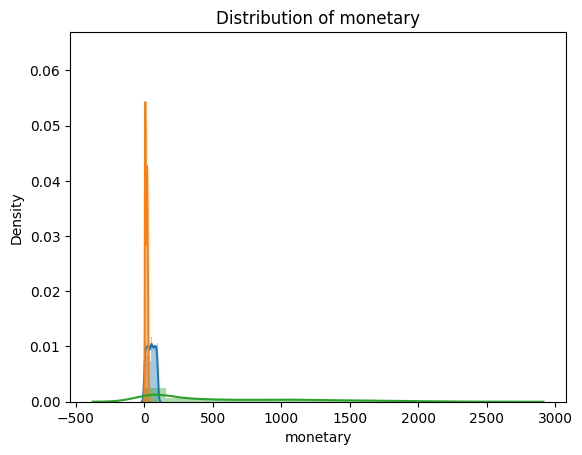

In [553]:
# Function to check skewness
def check_skew(RFM_Table_skew, column):
    skew = stats.skew(RFM_Table_skew[column])
    skewtest = stats.skewtest(RFM_Table_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(RFM_Table_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
check_skew(RFM_Table, 'recency')
check_skew(RFM_Table, 'frequency')
check_skew(RFM_Table, 'monetary')

In [554]:
RFM_Table

,id,age,income,recency,liquor,food,jewellery,monetary,children,frequency,marital_status_married,marital_status_single,marital_status_together,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,RFM_Customer_Segment
831,1001.0,30.0,61074.0,37.0,790.0,163.0,152.0,1105.0,1,31.0,1,0,0,2,1,1,211,4,Loyal Customers
1132,1002.0,35.0,60093.0,92.0,503.0,145.0,90.0,738.0,1,21.0,1,0,0,4,2,2,422,8,Other
301,1005.0,46.0,79689.0,65.0,312.0,885.0,121.0,1318.0,0,27.0,0,1,0,3,1,1,311,5,Loyal Customers
1101,1006.0,37.0,41021.0,12.0,15.0,40.0,12.0,67.0,1,7.0,0,0,1,1,4,4,144,9,Other
2888,1007.0,28.0,57333.0,55.0,942.0,547.0,176.0,1665.0,1,33.0,0,0,0,3,1,1,311,5,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,9980.0,32.0,22010.0,51.0,12.0,16.0,8.0,36.0,1,7.0,0,0,1,3,4,4,344,11,Lost Customers
1920,9985.0,38.0,38361.0,74.0,40.0,86.0,14.0,140.0,1,10.0,0,0,1,3,3,3,333,9,Other
2315,9986.0,34.0,56628.0,30.0,480.0,113.0,171.0,764.0,1,20.0,0,1,0,2,2,2,222,6,Other
1903,9990.0,31.0,75330.0,94.0,556.0,495.0,61.0,1112.0,2,29.0,1,0,0,4,1,1,411,6,Loyal Customers


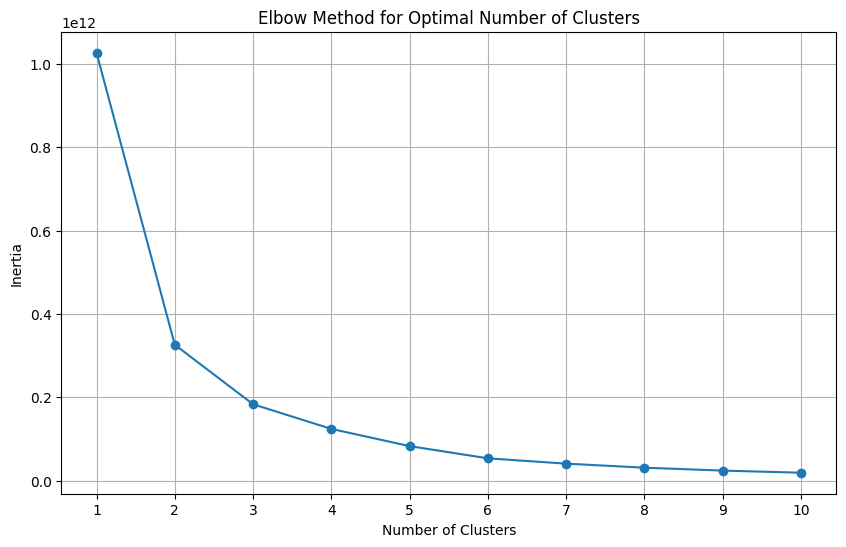

In [555]:
# ELBOW METHOD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def calculate_inertia(data, max_clusters):
    inertia = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia
max_clusters = 10
inertia = calculate_inertia(RFM_Table[['age', 'income', 'recency', 'liquor', 'food', 'jewellery', 'children',
                                       'marital_status_married']], max_clusters)
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker = 'o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

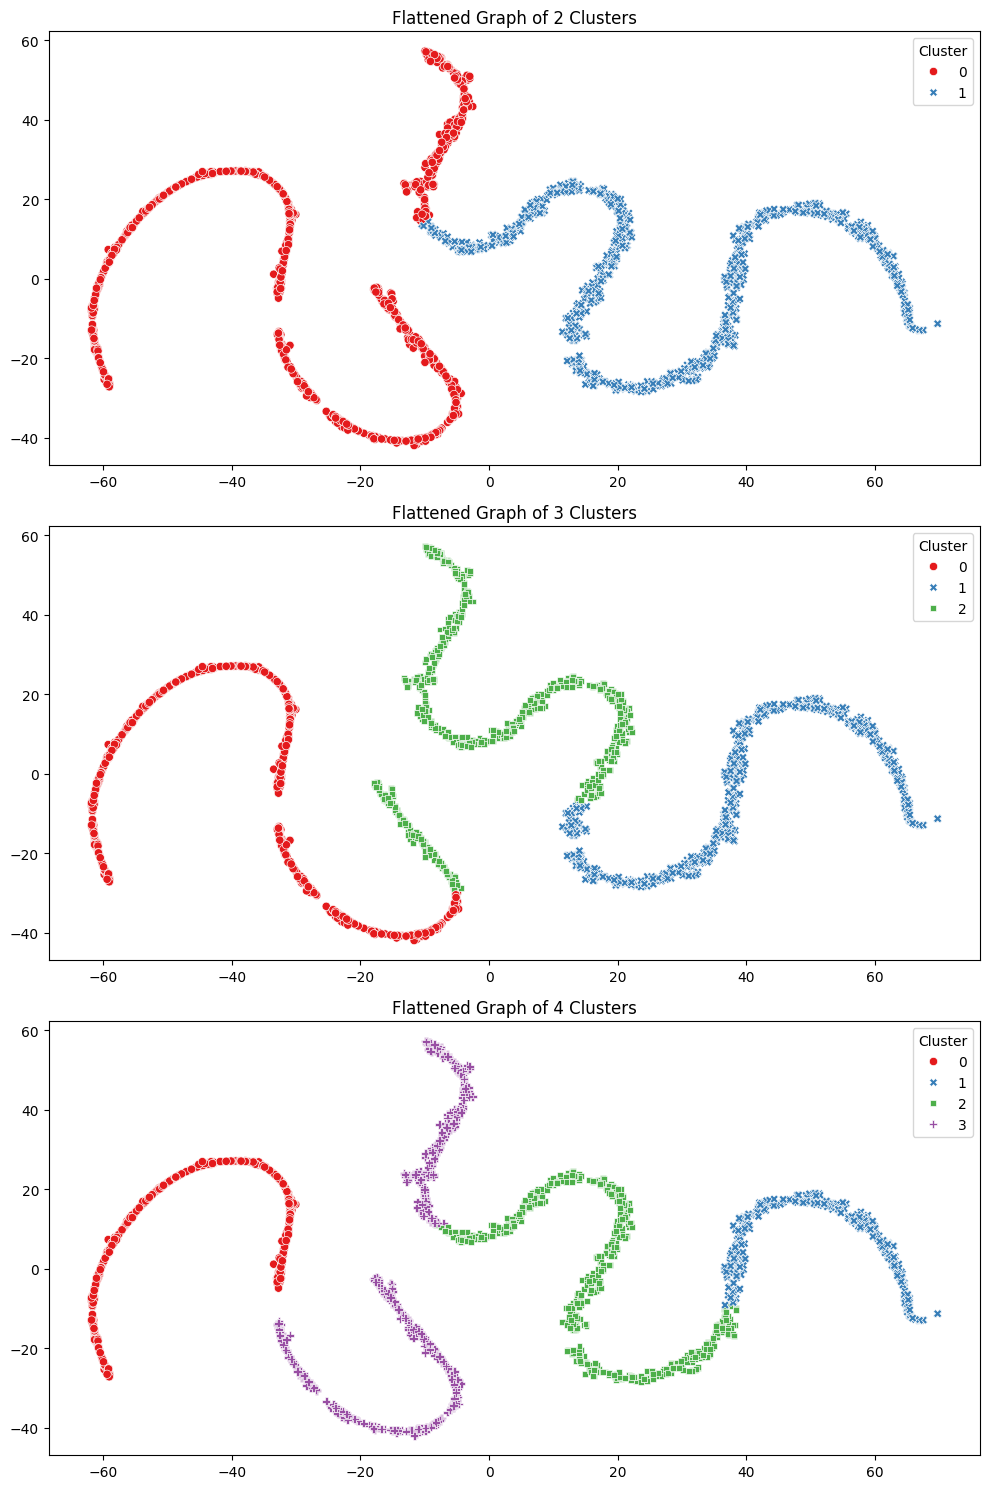

In [556]:
# Kmeans clustering
from sklearn.manifold import TSNE
rfm_scaled = RFM_Table[['age', 'income', 'recency', 'liquor', 'food', 'jewellery', 'children',
                        'marital_status_married', 'marital_status_single', 'marital_status_together']]

# Function to apply KMeans and return the DataFrame with cluster labels
def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    data['Cluster'] = kmeans.labels_
    return data

# Function to apply t-SNE and return the transformed data
def apply_tsne(data):
    tsne = TSNE(n_components=2, random_state=1)
    transformed = tsne.fit_transform(data)
    return transformed

# Apply KMeans clustering for 3, 4, and 5 clusters
df_rfm_k2 = apply_kmeans(rfm_scaled.copy(), 2)
df_rfm_k3 = apply_kmeans(rfm_scaled.copy(), 3)
df_rfm_k4 = apply_kmeans(rfm_scaled.copy(), 4)

# Reduce dimensions using t-SNE for visualization
df_rfm_k2_tsne = apply_tsne(df_rfm_k2.drop(columns = ['Cluster']))
df_rfm_k3_tsne = apply_tsne(df_rfm_k3.drop(columns = ['Cluster']))
df_rfm_k4_tsne = apply_tsne(df_rfm_k4.drop(columns = ['Cluster']))

# Plot the clusters using subplots
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
plt.title('Flattened Graph of 2 Clusters')
sns.scatterplot(x = df_rfm_k2_tsne[:, 0], y = df_rfm_k2_tsne[:, 1], hue = df_rfm_k2['Cluster'], style = df_rfm_k2['Cluster'], palette = "Set1")

plt.subplot(3, 1, 2)
plt.title('Flattened Graph of 3 Clusters')
sns.scatterplot(x = df_rfm_k3_tsne[:, 0], y = df_rfm_k3_tsne[:, 1], hue = df_rfm_k3['Cluster'], style = df_rfm_k3['Cluster'], palette = "Set1")

plt.subplot(3, 1, 3)
plt.title('Flattened Graph of 4 Clusters')
sns.scatterplot(x = df_rfm_k4_tsne[:, 0], y = df_rfm_k4_tsne[:, 1], hue = df_rfm_k4['Cluster'], style = df_rfm_k4['Cluster'], palette = "Set1")

plt.tight_layout()
plt.show()

In [557]:
df_rfm_k4 = apply_kmeans(rfm_scaled.copy(), 4)
df_rfm_k4

,age,income,recency,liquor,food,jewellery,children,marital_status_married,marital_status_single,marital_status_together,Cluster
831,30.0,61074.0,37.0,790.0,163.0,152.0,1,1,0,0,2
1132,35.0,60093.0,92.0,503.0,145.0,90.0,1,1,0,0,2
301,46.0,79689.0,65.0,312.0,885.0,121.0,0,0,1,0,1
1101,37.0,41021.0,12.0,15.0,40.0,12.0,1,0,0,1,3
2888,28.0,57333.0,55.0,942.0,547.0,176.0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
110,32.0,22010.0,51.0,12.0,16.0,8.0,1,0,0,1,0
1920,38.0,38361.0,74.0,40.0,86.0,14.0,1,0,0,1,3
2315,34.0,56628.0,30.0,480.0,113.0,171.0,1,0,1,0,2
1903,31.0,75330.0,94.0,556.0,495.0,61.0,2,1,0,0,1


In [558]:
RFM_Table["Cluster"] = df_rfm_k4["Cluster"]
RFM_Table[['num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month']] = data_rfm[['num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month']]
RFM_Table.groupby('Cluster')[['id', 'age', 'income', 'recency', 'liquor', 'food', 'jewellery', 'children',
                              'marital_status_married', 'marital_status_single', 'marital_status_together',
                              'num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month']].mean().round(2)

,id,age,income,recency,liquor,food,jewellery,children,marital_status_married,marital_status_single,marital_status_together,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month
Cluster,,,,,,,,,,,,,,,,
0,5598.09,36.20,24177.36,48.00,20.32,43.77,16.46,1.02,0.39,0.24,0.26,2.03,1.98,0.46,2.94,7.03
1,5438.51,35.91,82990.16,50.11,660.71,697.32,70.96,0.31,0.38,0.23,0.26,1.27,5.25,6.07,8.25,2.68
2,5441.20,36.17,63427.42,48.29,483.69,341.43,62.90,0.90,0.40,0.18,0.26,2.73,5.65,3.78,8.04,4.56
3,5487.39,35.96,43471.12,50.16,138.51,88.96,30.72,1.32,0.37,0.22,0.26,2.76,3.46,1.26,4.32,6.30


In [559]:
RFM_Table.groupby('Cluster')[['id', 'age', 'income', 'recency',
                              'num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month']].mean().round(2)

,id,age,income,recency,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month
Cluster,,,,,,,,,
0,5598.09,36.20,24177.36,48.00,2.03,1.98,0.46,2.94,7.03
1,5438.51,35.91,82990.16,50.11,1.27,5.25,6.07,8.25,2.68
2,5441.20,36.17,63427.42,48.29,2.73,5.65,3.78,8.04,4.56
3,5487.39,35.96,43471.12,50.16,2.76,3.46,1.26,4.32,6.30


In [560]:
RFM_Table.groupby('Cluster')['id'].count()

Cluster
0    500
1    395
2    654
3    690
Name: id, dtype: int64

# VII. EXTENSION

## 1. Để cải thiện mô hình phân cụm khách hàng và mở rộng các usecase, chúng ta có thể bổ sung thêm các trường dữ liệu như:
## - Về Demographic Information: Nghề nghiệp của khách hàng (mỗi nghề nghiệp sẽ có mỗi mức thu nhập khác nhau)
## - Geographic Information: Quốc gia sinh sống, địa chỉ hoặc khu vực sinh sống (mức sống ở các quốc gia là khác nhau và tương tự là vùng miền của mỗi quốc gia)
## - Device_Used_for_Purchases: Thiết bị mà khách hàng sử dụng để mua hàng (máy tính, điện thoại di động, máy tính bảng)
## - Customer Satisfaction Score: Điểm hài lòng của khách hàng, có thể thu thập từ các khảo sát hoặc đánh giá
## - Preferred_Contact_Channel: Kênh liên lạc ưa thích của khách hàng (email, điện thoại, SMS, mạng xã hội).

## 2. Một số bài toán có thể mở rộng từ bộ dataset đã cho:
## - Bài toán dự đoán giá trị vòng đời khách hàng (CLV)
## - Bài toán dự đoán khả năng khách hàng rời bỏ (Churn Prediction)
## - Bài toán dự đoán doanh thu thu được từ một khách hàng
## - Bài toán đề xuất sản phẩm dựa trên hành vi mua sắm và sở thích của khách hàng
## - Bài toán phân tích lượng khách hàng cũ và khách hàng mới
## - Bài toán phân tích mức độ hài lòng của khách hàng
...

## 3. Để tăng độ chính xác và mở rộng số lượng usecase, chúng ta có thể tham khảo một số nguồn open-data như:
## - Dữ liệu dân số từ nguồn World Bank
## - Dữ liệu địa lý từ OpenStreetMap
## - Dữ liệu từ mạng xã hội như Facebook, Twitter, Instagram, ...
## - Dữ liệu từ các sàn thương mại điện tử như Amazon, Shopee, TikTok Shop, Lazada, Tiki,...
## - Dữ liệu thống kê về nhiều lĩnh vực khác nhau, bao gồm kinh tế, xã hội, và hành vi người tiêu dùng từ Statista
